In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import time
start_time = time.time()

In [3]:
print("Process Initialised")

Process Initialised


# Load Training Dataset

In [4]:
import numpy as np
import pandas as pd

In [5]:
%%time
df_train = pd.read_csv(r"./source/train_tfidf_features.csv")
display(df_train)

,id,label,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17179,17180,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17180,17181,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17181,17182,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17182,17183,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CPU times: total: 16.2 s
Wall time: 16.3 s


In [6]:
%%time
df_train.describe()

CPU times: total: 10.8 s
Wall time: 11 s


,id,label,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
count,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,...,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000
mean,8592.500000,0.381227,0.000150,0.001066,0.001532,0.000369,0.000140,0.000066,0.000270,0.000483,...,0.000202,0.000429,0.000286,0.000075,0.000260,0.000709,0.000257,0.000121,0.000308,0.000159
std,4960.737848,0.485702,0.008297,0.019532,0.024741,0.012334,0.008276,0.005065,0.009907,0.013106,...,0.010215,0.013178,0.011378,0.005866,0.010864,0.017641,0.010246,0.006529,0.010526,0.008536
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4296.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8592.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12888.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17184.000000,1.000000,0.676327,0.560830,0.958430,0.646740,0.532789,0.437760,0.435835,0.536746,...,0.611122,0.540809,0.566613,0.592170,0.617341,0.850605,0.484908,0.398105,0.430031,0.528556


# Task 1: Implement Logistic Regression
Recalled that you have learned about Logistic Regression in your earlier class. Your task is to implement a Logistic Regression model from scratch. \
Note that you are NOT TO USE the sklearn logistic regression package or any other pre-defined logistic regression package for this task! \
Usage of any logistic regression packages will result in 0 marks for this task.

## Key Task Deliverables
1a. Code implementation of the Logistic Regression model. \
1b. Prediction made by your Logistic Regression on the Test set. Note that you are welcome to submit your predicted labels to Kaggle but you will need to submit the final prediction output in the final project submission. Please label the file as "LogRed_Prediction.csv".

-- `sigmoid(z)`: A function that takes in a Real Number input and returns an output value between 0 and 1.

In [7]:
def sigmoid(z):
    result = 1/(1 + np.exp(-z))
#     print(f"sigmoid: {result}")
    return result

-- `loss(y, y_hat)`: A loss function that allows us to minimize and determine the optimal parameters. The function takes in the actual labels y and the predicted labels yhat, and returns the overall training loss. Note that you should be using the Log Loss function taught in class.

Note: We have decided the add a regulariser (denoted by the `lmb` term) to observe whether there is an improvement in utilising L2 regularisation in our Logisitic Regression Model. As such, we have decided to change the arguments of the function  to accomodate for regularisation.

In [8]:
def loss(y, X, w, b, lmb):
    y_hat = sigmoid(np.dot(X, w) + b)
    m = np.shape(y)[0]
    
    loss = -1 * np.where(y == 1, np.log(y_hat), np.log(1 - y_hat)).mean()
    reg = lmb * np.sum(w**2) / (2 * m)
    error = loss + reg
    
#     print(f"training loss = {loss}, regularisation term = {reg}, training error = {error}")
    return error

-- `gradients(X, y, y_hat)`: The Gradient Descent Algorithm to find the optimal values of our parameters. The function takes in the training feature X, actual labels y and the predicted labels yhat, and returns the partial derivative of the Loss function with respect to weights (dw) and bias (db).

Likewise, the arguments of the `gradients` function has been altered to accommodate for L2 regularisation.

In [9]:
def gradients(y, X, w, b, lmb):
    # m - number of training examples
    m = np.shape(X)[0]
    y_hat = sigmoid(np.dot(X, w) + b)
    
    dw = (1 / m) * (np.dot(X.T, (y_hat - y)) + lmb * w)
    db = (1 / m) * np.sum((y_hat - y))
    
#     print(f"dw: {dw}, db: {db}")
    return dw, db

-- `train(X, y, bs, epochs, lr)`: The training function for your model.

We added the `C` term to represent the penalty term `lmb`. The relationship is that `lmb = 1/C` if `C != 0`. Otherwise,`lmb = 0`, where we do not apply regularisation.

In [10]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train(X, y, bs, epochs, lr, C):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
    w = np.zeros((d, 1))
    b = 0
#     w = rng.uniform(size=(d,1))
#     b = rng.random()
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs
#         print(f"limit: {limit}")

        for i in range(limit):
            start = i * bs
            end = start + bs
#             print(f"epoch: {epoch}, start: {start}, end: {end}")
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
#             print(f"choice: {choice}")
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            w_new = w.copy() - lr * dw
            b_new = b - lr * db
            loss_new = loss(y, X, w_new, b_new, lmb)
            
            if (loss_new < loss_old):
#                 print(w == w_new, b == b_new);
#                 print(f"loss_new: {loss_new}, loss_old: {loss_old}")

                w = w_new
                b = b_new
                old_w.append(w_new)
                old_b.append(b_new)
                old_losses.append(loss_new)
    
    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
#     print(f"old_w: {old_w}")
#     print(f"old_b: {old_b}")
#     print(f"old_losses: {old_losses}")
#     print(f"min_loss: {min_loss}")
#     print(f"min_index:", min_index)
    
    return old_w[min_index], old_b[min_index], old_losses

-- `predict(X, w, b)`: The prediction function where you can apply your validation and test sets.

In [11]:
def predict(X, w, b):
    y_pred = sigmoid(np.dot(X, w) + b)
    pred_labels = np.array([1 if i >= 0.5 else 0 for i in y_pred])
    return pred_labels

## Performance Evaluation

As per the grading rubric - "Perfect Implementation of the Logistics Regression algorithm. Successfully trained the implemented model with the train set and achieved comparative performance compared to SKLearn Logistic Regression package", we shall compare the performance of our model with the SKLearn LogisticRegression and SGDClassifier package.

We shall first implement a function to evaluate the accuracy of our model. The goal is to achieve a Macro-F1 score that is within 0.05 of the Macro-F1 score of the SKLearn Package

In [12]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [13]:
def score(y, y_hat):
    accuracy = np.sum(y == y_hat) / np.shape(y)[0]
    f1score = f1_score(y, y_hat, average='macro')

    print(f"Accuracy: {accuracy}")
    print(f"Macro-F1 score: {f1score}")

    # Return Macro-F1 score of the model
    return f1score

In [14]:
def perform(LogReg, SGD, **scores):
    models = []

    for model, score in scores.items():
        result = max(abs(LogReg - score), abs(SGD - score))
        print(f"Model: {model}, Macro-F1 Score: {score}, Difference: {result}")

        if result <= 0.05:
            models.append(model)
    
    quality = "Success" if len(models) > 0 else "Failed"
    print(f"Model {quality}")

    return models

In [15]:
%%time
X = df_train.iloc[:, 2:5002].to_numpy()
y = df_train.iloc[:,1].to_numpy()
print(f"X: {X.shape}, y: {y.shape}")

X: (17184, 5000), y: (17184,)
CPU times: total: 219 ms
Wall time: 234 ms


Splitting of Training Data Set to Perform Internal Validation of ML Model

In [16]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (12888, 5000), y_train: (12888,)
X_test: (4296, 5000), y_test: (4296,)
CPU times: total: 2.09 s
Wall time: 2.21 s


Initialisation of Hyperparameters for Logistic Regression Model

In [17]:
bs = 128
epochs = 16
lr = 0.1
C = 0
print(bs, epochs, lr, C)

128 16 0.1 0


Evaluation of Logisitic Regression Model

In [18]:
%%time
w, b, l = train(X_train, y_train, bs, epochs, lr, C)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model = score(y_test, predict(X_test, w, b))
Model

[[-0.00172004]
 [-0.02492764]
 [ 0.00550406]
 ...
 [ 0.00015613]
 [ 0.01175477]
 [ 0.00490417]]
-0.5020697905473851
0.6493706267318076
1404
Accuracy: 0.6259310986964618
Macro-F1 score: 0.3867287807981557
CPU times: total: 10min 23s
Wall time: 1min 36s


0.3867287807981557

Evaluation of SKLearn Logistic Regression Model (LogisticRegression and SGDClassifier)

In [19]:
%%time
clf1 = LogisticRegression(random_state = 100).fit(X_train, y_train)
print(clf1.coef_)
print(clf1.intercept_)
SKLearnLogReg = score(y_test, clf1.predict(X_test))
SKLearnLogReg

[[-0.58187735 -1.02280517 -0.39681143 ... -0.04059766  0.49543838
   0.40047111]]
[-0.84683029]
Accuracy: 0.7302141527001862
Macro-F1 score: 0.6906115962801043
CPU times: total: 20.7 s
Wall time: 2.85 s


0.6906115962801043

In [20]:
%%time
clf2 = SGDClassifier(loss="log", random_state=100).fit(X_train, y_train)
# clf2 = SGDClassifier(loss="log_loss", random_state=100).fit(X_train, y_train)
print(clf2.coef_)
print(clf2.intercept_)
SKLearnSGD = score(y_test, clf2.predict(X_test))
SKLearnSGD

c:\Users\issac\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[[-0.47493728 -0.87421955 -0.31040593 ... -0.0494175   0.42273107
   0.31604817]]
[-0.75282034]
Accuracy: 0.728584729981378
Macro-F1 score: 0.6895107183766978
CPU times: total: 2.84 s
Wall time: 2.89 s


0.6895107183766978

In [21]:
perform(SKLearnLogReg, SKLearnSGD, Model=Model)

Model: Model, Macro-F1 Score: 0.3867287807981557, Difference: 0.30388281548194856
Model Failed


[]

Based on the above results, we can observe that our Logistic Regression Model is severely underperforming as compared to the SKLearn Packages. We believe that this can be due to 2 possible reasons - The initialisation of the parameters `w` and `b` and the greedy approach adopted in navigating the gradient descent algorithm. 

We shall try a random initialisation and try 2 additional variations in developing our gradient descent algorithm (One where we choose the parameters that ensures minimum training error after every epoch and another where we choose the the parameters that ensure minimum training error at the end of the algorithm).

We will evaluate these 3 models and compare their scores with those of the SKLearn Packages.

## Tuning the Logistic Regression Model

### Tuning the Gradient Descent Algorithm

For the `train1` function, we will implement a random initialisation of parameters `w` and `b` whose values are very close to 0 using the uniform distribution [0, 1).

In [22]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train1(X, y, bs, epochs, lr, C):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
#     w = np.zeros((d, 1))
#     b = 0
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs
#         print(f"limit: {limit}")

        for i in range(limit):
            start = i * bs
            end = start + bs
#             print(f"epoch: {epoch}, start: {start}, end: {end}")
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
#             print(f"choice: {choice}")
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            w_new = w.copy() - lr * dw
            b_new = b - lr * db
            loss_new = loss(y, X, w_new, b_new, lmb)
            
            if (loss_new < loss_old):
#                 print(w == w_new, b == b_new);
#                 print(f"loss_new: {loss_new}, loss_old: {loss_old}")

                w = w_new
                b = b_new
                old_w.append(w_new)
                old_b.append(b_new)
                old_losses.append(loss_new)
    
    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
#     print(f"old_w: {old_w}")
#     print(f"old_b: {old_b}")
#     print(f"old_losses: {old_losses}")
#     print(f"min_loss: {min_loss}")
#     print(f"min_index:", min_index)
    
    return old_w[min_index], old_b[min_index], old_losses

For the `train2` function, we will implement a random initialisation of parameters `w` and `b` whose values are very close to 0 using the uniform distribution [0, 1). Also, we will only choose the parameters that ensure minimum training error only at the end of the algorithm.

In [23]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train2(X, y, bs, epochs, lr, C):
    lmb = 0 if C == 0 else 1/C

    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs
#         print(f"limit: {limit}")

        for i in range(limit):
            start = i * bs
            end = start + bs
#             print(f"epoch: {epoch}, start: {start}, end: {end}")
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
#             print(f"choice: {choice}")
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            w_new = w.copy() - lr * dw
            b_new = b - lr * db
            loss_new = loss(y, X, w_new, b_new, lmb)
#             print(w == w_new, b == b_new);
#             print(f"loss_new: {loss_new}, loss_old: {loss_old}")

            w = w_new
            b = b_new
            old_w.append(w_new)
            old_b.append(b_new)
            old_losses.append(loss_new)

    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
#     print(f"old_w: {old_w}")
#     print(f"old_b: {old_b}")
#     print(f"old_losses: {old_losses}")
#     print(f"min_loss: {min_loss}")
#     print(f"min_index:", min_index)
    
    return old_w[min_index], old_b[min_index], old_losses

For the `train3` function, we will implement a random initialisation of parameters `w` and `b` whose values are very close to 0 using the uniform distribution [0, 1). Also, we will only choose the parameters that ensure minimum training error after every epoch.

In [24]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train3(X, y, bs, epochs, lr, C):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
#     w = np.zeros((d, 1))
#     b = 0
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs
#         print(f"limit: {limit}")

        for i in range(limit):
            start = i * bs
            end = start + bs
#             print(f"epoch: {epoch}, start: {start}, end: {end}")
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
#             print(f"choice: {choice}")
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            w_new = w.copy() - lr * dw
            b_new = b - lr * db
            loss_new = loss(y, X, w_new, b_new, lmb)
            
#             print(w == w_new, b == b_new);
#             print(f"loss_new: {loss_new}, loss_old: {loss_old}")
            
            w = w_new
            b = b_new
            old_w.append(w_new)
            old_b.append(b_new)
            old_losses.append(loss_new)
        
        min_loss = min(old_losses)
        min_index = old_losses.index(min_loss)
        w = old_w[min_index]
        b = old_b[min_index]
        
    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
#     print(f"old_w: {old_w}")
#     print(f"old_b: {old_b}")
#     print(f"old_losses: {old_losses}")
#     print(f"min_loss: {min_loss}")
#     print(f"min_index:", min_index)
    
    return old_w[min_index], old_b[min_index], old_losses

In [25]:
%%time
w, b, l = train1(X_train, y_train, bs, epochs, lr, C)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model1 = score(y_test, predict(X_test, w, b))
Model1

[[0.82953088]
 [0.56112497]
 [0.28441661]
 ...
 [0.54737681]
 [0.20428492]
 [0.14764031]]
-1.7553462188993563
0.6582263563878277
1477
Accuracy: 0.6240689013035382
Macro-F1 score: 0.48659922937049865
CPU times: total: 10min 20s
Wall time: 1min 39s


0.48659922937049865

In [26]:
%%time
w, b, l = train2(X_train, y_train, bs, epochs, lr, C)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model2 = score(y_test, predict(X_test, w, b))
Model2

[[0.82917508]
 [0.55758287]
 [0.28212895]
 ...
 [0.54710171]
 [0.2049865 ]
 [0.14875909]]
-1.7440156421330273
0.6568636717097833
1600
Accuracy: 0.6243016759776536
Macro-F1 score: 0.4920613897314961
CPU times: total: 10min 9s
Wall time: 1min 39s


0.4920613897314961

In [27]:
%%time
w, b, l = train3(X_train, y_train, bs, epochs, lr, C)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model3 = score(y_test, predict(X_test, w, b))
Model3

[[0.82917524]
 [0.55793472]
 [0.28220347]
 ...
 [0.5470061 ]
 [0.20511076]
 [0.14884337]]
-1.7438202768654791
0.656952130767089
1600
Accuracy: 0.6243016759776536
Macro-F1 score: 0.4920613897314961
CPU times: total: 10min 6s
Wall time: 1min 21s


0.4920613897314961

In [28]:
perform(SKLearnLogReg, SKLearnSGD, Model=Model, \
Model1=Model1, Model2=Model2, Model3=Model3)

Model: Model, Macro-F1 Score: 0.3867287807981557, Difference: 0.30388281548194856
Model: Model1, Macro-F1 Score: 0.48659922937049865, Difference: 0.2040123669096056
Model: Model2, Macro-F1 Score: 0.4920613897314961, Difference: 0.19855020654860817
Model: Model3, Macro-F1 Score: 0.4920613897314961, Difference: 0.19855020654860817
Model Failed


[]

Based on the above results, we can see that the random initialisation of `w` and `b` has improved the performance of the gradient descent algorithm. However, we have noted that varying the design of the gradient descent algorithm at this stage has minimal effect on the model performance.

Upon inspection of the training dataset, we have noted that the training data is extremely sparse. Hence, we need to incorporate the idea of momentum and adaptive learning rate into our gradient descent algorithm. The introduction of momentum is to ensure that the gradient descent algorithm moves in the direction of the trend (weighted average of gradients) even in the presence of anomalous gradient values or zero gradient values. This would help accelerate the training process.

Additionally, as a result of sparse data, we require an adaptive learning rate that is able to boost the respective parameters of `w_i` and `b` appropriately such that the algorithm is more sensitive to valuable data that are present within the training set. This would help improve the correction and accelerate the training process.

Based on the 2 requirements, we have decided to use the `AdamW` optimiser, which uses a combination of momentum and RMSProp. Moreover, `AdamW` is an improvement over the `Adam` optimiser, in that it supports regularisation by introducing a Weight Decay component to the gradient descent algorithm. This is necessary due to the use of adaptive learning rate that skews the regularisation of parameters in the `Adam` optimiser.

Likewise, we will introduce 3 different variants of the `AdamW` optimiser. \
    1. One where we choose the parameters that ensure a smaller training error after every update (Greedy Approach) \
    2. One where we choose the parameters that ensure minimum training error at the end of the algorithm \
    3. One where we choose the parameters that ensures minimum training error after every epoch

For the `train4` function, it is an improvement of the `train1` function. We will use the `AdamW` optimiser instead of the conventional gradient descent algorithm. We will maintain the random initialisation in this algorithm.

In [29]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train4(X, y, bs, epochs, lr, C, beta_m, beta_v, err):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
#     w = np.zeros((d, 1))
#     b = 0
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    m_w = np.zeros((d, 1))
    m_b = 0
    v_w = np.zeros((d, 1))
    v_b = 0
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs
#         print(f"limit: {limit}")

        for i in range(limit):
            start = i * bs
            end = start + bs
#             print(f"epoch: {epoch}, start: {start}, end: {end}")
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
#             print(f"choice: {choice}")
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            
            #AdamW
            m_w = beta_m * m_w + (1 - beta_m) * dw
            m_b = beta_m * m_b + (1 - beta_m) * db
            v_w = beta_v * v_w + (1 - beta_v) * np.square(dw)
            v_b = beta_v * v_b + (1 - beta_v) * (db**2)
            
            #bias correction
            t = len(old_losses)
            m_what = m_w /(1 - beta_m**t)
            m_bhat = m_b /(1 - beta_m**t)
            v_what = v_w /(1 - beta_v**t)
            v_bhat = v_b /(1 - beta_v**t)
            
            w_new = w.copy() - lr * (m_what/(np.sqrt(v_what) + err) + lmb * w.copy() / bs)
            b_new = b - lr * lr * (m_bhat/(np.sqrt(v_bhat) + err))
            loss_new = loss(y, X, w_new, b_new, lmb)
            
            if (loss_new < loss_old):
#                 print(w == w_new, b == b_new);
#                 print(f"loss_new: {loss_new}, loss_old: {loss_old}")

                w = w_new
                b = b_new
                old_w.append(w_new)
                old_b.append(b_new)
                old_losses.append(loss_new)
    
    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
#     print(f"old_w: {old_w}")
#     print(f"old_b: {old_b}")
#     print(f"old_losses: {old_losses}")
#     print(f"min_loss: {min_loss}")
#     print(f"min_index:", min_index)
    
    return old_w[min_index], old_b[min_index], old_losses

For the `train5` function, it is an improvement of the `train2` function. We will use the `AdamW` optimiser instead of the conventional gradient descent algorithm. We will maintain the random initialisation in this algorithm.

In [30]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train5(X, y, bs, epochs, lr, C, beta_m, beta_v, err):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
#     w = np.zeros((d, 1))
#     b = 0
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    m_w = np.zeros((d, 1))
    m_b = 0
    v_w = np.zeros((d, 1))
    v_b = 0
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs
#         print(f"limit: {limit}")

        for i in range(limit):
            start = i * bs
            end = start + bs
#             print(f"epoch: {epoch}, start: {start}, end: {end}")
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            
            #AdamW
            m_w = beta_m * m_w + (1 - beta_m) * dw
            m_b = beta_m * m_b + (1 - beta_m) * db
            v_w = beta_v * v_w + (1 - beta_v) * np.square(dw)
            v_b = beta_v * v_b + (1 - beta_v) * (db**2)
            
            #bias correction
            t = len(old_losses)
            m_what = m_w /(1 - beta_m**t)
            m_bhat = m_b /(1 - beta_m**t)
            v_what = v_w /(1 - beta_v**t)
            v_bhat = v_b /(1 - beta_v**t)
            
            w_new = w.copy() - lr * (m_what/(np.sqrt(v_what) + err) + lmb * w.copy() / bs)
            b_new = b - lr * lr * (m_bhat/(np.sqrt(v_bhat) + err))
            loss_new = loss(y, X, w_new, b_new, lmb)
#             print(w == w_new, b == b_new);
#             print(f"loss_new: {loss_new}, loss_old: {loss_old}")
            
            w = w_new
            b = b_new
            old_w.append(w_new)
            old_b.append(b_new)
            old_losses.append(loss_new)

    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
#     print(f"old_w: {old_w}")
#     print(f"old_b: {old_b}")
#     print(f"old_losses: {old_losses}")
#     print(f"min_loss: {min_loss}")
#     print(f"min_index:", min_index)
    
    return old_w[min_index], old_b[min_index], old_losses

For the `train6` function, it is an improvement of the `train3` function. We will use the `AdamW` optimiser instead of the conventional gradient descent algorithm. We will maintain the random initialisation in this algorithm.

In [31]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train6(X, y, bs, epochs, lr, C, beta_m, beta_v, err):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
#     w = np.zeros((d, 1))
#     b = 0
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    m_w = np.zeros((d, 1))
    m_b = 0
    v_w = np.zeros((d, 1))
    v_b = 0
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs
#         print(f"limit: {limit}")

        for i in range(limit):
            start = i * bs
            end = start + bs
#             print(f"epoch: {epoch}, start: {start}, end: {end}")
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
#             print(f"choice: {choice}")
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            
            #AdamW
            m_w = beta_m * m_w + (1 - beta_m) * dw
            m_b = beta_m * m_b + (1 - beta_m) * db
            v_w = beta_v * v_w + (1 - beta_v) * np.square(dw)
            v_b = beta_v * v_b + (1 - beta_v) * (db**2)
            
            #bias correction
            t = len(old_losses)
            m_what = m_w /(1 - beta_m**t)
            m_bhat = m_b /(1 - beta_m**t)
            v_what = v_w /(1 - beta_v**t)
            v_bhat = v_b /(1 - beta_v**t)
            
            w_new = w.copy() - lr * (m_what/(np.sqrt(v_what) + err) + lmb * w.copy() / bs)
            b_new = b - lr * lr * (m_bhat/(np.sqrt(v_bhat) + err))
            loss_new = loss(y, X, w_new, b_new, lmb)
            
#             print(w == w_new, b == b_new);
#             print(f"loss_new: {loss_new}, loss_old: {loss_old}")
            
            w = w_new
            b = b_new
            old_w.append(w_new)
            old_b.append(b_new)
            old_losses.append(loss_new)
        
        min_loss = min(old_losses)
        min_index = old_losses.index(min_loss)
        w = old_w[min_index]
        b = old_b[min_index]
        
    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
#     print(f"old_w: {old_w}")
#     print(f"old_b: {old_b}")
#     print(f"old_losses: {old_losses}")
#     print(f"min_loss: {min_loss}")
#     print(f"min_index:", min_index)
    
    return old_w[min_index], old_b[min_index], old_losses

Based on our research, the recommended values of the hyperparameters for the AdamW optimizer are `beta_m = 0.9`, `beta_v = 0.999` and `err = 1e-8`.

In [32]:
bs = 128
epochs = 16
lr = 0.1
C = 0
beta_m = 0.9
beta_v = 0.999
err = 1e-8
print(bs, epochs, lr, C, beta_m, beta_v, err)

128 16 0.1 0 0.9 0.999 1e-08


In [33]:
%%time
w, b, l = train4(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model4 = score(y_test, predict(X_test, w, b))
Model4

[[-8.47741643]
 [-8.10057621]
 [-4.33031263]
 ...
 [ 1.54335685]
 [ 3.65972176]
 [ 3.82466584]]
-1.1785629010376373
0.2810261570260205
1462
Accuracy: 0.6722532588454376
Macro-F1 score: 0.6494362017804154
CPU times: total: 10min 15s
Wall time: 1min 19s


0.6494362017804154

In [34]:
%%time
w, b, l = train5(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model5 = score(y_test, predict(X_test, w, b))
Model5

[[-9.15852804]
 [-8.63754918]
 [-4.72636096]
 ...
 [ 1.62198725]
 [ 3.88039144]
 [ 3.71492837]]
-1.2682779368539099
0.28378523874847067
1598
Accuracy: 0.6715549348230913
Macro-F1 score: 0.6496150778344336
CPU times: total: 10min 2s
Wall time: 1min 20s


0.6496150778344336

In [35]:
%%time
w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model6 = score(y_test, predict(X_test, w, b))
Model6

[[-8.22759819]
 [-8.33745542]
 [-3.9632901 ]
 ...
 [ 1.95402751]
 [ 3.52822577]
 [ 3.67153536]]
-1.1590263536783283
0.2840447771365454
1532
Accuracy: 0.672951582867784
Macro-F1 score: 0.6507565038781207
CPU times: total: 10min 12s
Wall time: 1min 19s


0.6507565038781207

In [36]:
perform(SKLearnLogReg, SKLearnSGD, Model=Model, \
Model1=Model1, Model2=Model2, Model3=Model3, \
Model4=Model4, Model5=Model5, Model6=Model6)

Model: Model, Macro-F1 Score: 0.3867287807981557, Difference: 0.30388281548194856
Model: Model1, Macro-F1 Score: 0.48659922937049865, Difference: 0.2040123669096056
Model: Model2, Macro-F1 Score: 0.4920613897314961, Difference: 0.19855020654860817
Model: Model3, Macro-F1 Score: 0.4920613897314961, Difference: 0.19855020654860817
Model: Model4, Macro-F1 Score: 0.6494362017804154, Difference: 0.04117539449968888
Model: Model5, Macro-F1 Score: 0.6496150778344336, Difference: 0.04099651844567065
Model: Model6, Macro-F1 Score: 0.6507565038781207, Difference: 0.039855092401983594
Model Success


['Model4', 'Model5', 'Model6']

Based on the above score, we can deem that the performance of our Logistic Regression Model is comparable to that of SKLearn Logistic Regression Package. Moreover, our best performing model is Model6. Hence, we shall refine our Logistic Regression Model by tuning the hyperparameters.

### Hyperparameter Tuning

To further improve our model performance, we will first find the best learning rate, regularisation coefficient, momentum coefficient, RMSProp coefficient and the Error Term. Once we have chosen the optimal hyperparameters, we will then decide on the Batch Size and Epoch Size to train our model.

In [37]:
Ls = [10**(-i) for i in range(4)]
Cs = [0.1, 1, 10, 100, 1000, 0]
Bm = [(9 - i)/10 for i in range(10)]
Bv = [(999 - 2*i)/1000 for i in range(6)]
Errs = [10**(-2*i) for i in range(5)]

print(f"Learning Rates: {Ls}")
print(f"Regularisation Coefficients: {Cs}")
print(f"Momentum Coefficients: {Bm}")
print(f"RMSProp Coefficients: {Bv}")
print(f"Error Terms: {Errs}")

Learning Rates: [1, 0.1, 0.01, 0.001]
Regularisation Coefficients: [0.1, 1, 10, 100, 1000, 0]
Momentum Coefficients: [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
RMSProp Coefficients: [0.999, 0.997, 0.995, 0.993, 0.991, 0.989]
Error Terms: [1, 0.01, 0.0001, 1e-06, 1e-08]


In [38]:
%%time
vals = {}
bs = 128
epochs = 4
lr = 0.1
C = 0
beta_m = 0.9
beta_v = 0.999
err = 1e-8

for lr in Ls:
    w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
    result = score(y_test, predict(X_test, w, b))
    # print(w)
    # print(b)
    # print(min(l))
    print(l.index(min(l)))
    print(lr, C, beta_m, beta_v, err, result)
    vals[result] = lr

print(vals)
maxval = max(vals.keys())
res = [v for k, v in vals.items() if k==maxval]
print(res, maxval)

Accuracy: 0.6538640595903166
Macro-F1 score: 0.60183066275978
303
1 0 0.9 0.999 1e-08 0.60183066275978
Accuracy: 0.6890130353817505
Macro-F1 score: 0.6662472846585037
400
0.1 0 0.9 0.999 1e-08 0.6662472846585037
Accuracy: 0.6778398510242085
Macro-F1 score: 0.6537110228158275
400
0.01 0 0.9 0.999 1e-08 0.6537110228158275
Accuracy: 0.3743016759776536
Macro-F1 score: 0.2723577235772358
400
0.001 0 0.9 0.999 1e-08 0.2723577235772358
{0.60183066275978: 1, 0.6662472846585037: 0.1, 0.6537110228158275: 0.01, 0.2723577235772358: 0.001}
[0.1] 0.6662472846585037
CPU times: total: 10min 18s
Wall time: 1min 19s


We shall choose a learning rate of `lr = 0.1`.

In [39]:
%%time
vals = {}
bs = 128
epochs = 4
lr = 0.1
C = 0
beta_m = 0.9
beta_v = 0.999
err = 1e-8

for C in Cs:
    w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
    result = score(y_test, predict(X_test, w, b))
    # print(w)
    # print(b)
    # print(min(l))
    print(l.index(min(l)))
    print(lr, C, beta_m, beta_v, err, result)
    vals[result] = C

print(vals)
maxval = max(vals.keys())
res = [v for k, v in vals.items() if k==maxval]
print(res, maxval)

Accuracy: 0.625465549348231
Macro-F1 score: 0.384791636832307
320
0.1 0.1 0.9 0.999 1e-08 0.384791636832307
Accuracy: 0.6261638733705773
Macro-F1 score: 0.3879851144518121
323
0.1 1 0.9 0.999 1e-08 0.3879851144518121
Accuracy: 0.680633147113594
Macro-F1 score: 0.5902111978259219
338
0.1 10 0.9 0.999 1e-08 0.5902111978259219
Accuracy: 0.7178770949720671
Macro-F1 score: 0.6847822296614012
315
0.1 100 0.9 0.999 1e-08 0.6847822296614012
Accuracy: 0.699487895716946
Macro-F1 score: 0.6741020618444631
400
0.1 1000 0.9 0.999 1e-08 0.6741020618444631
Accuracy: 0.6890130353817505
Macro-F1 score: 0.6662472846585037
400
0.1 0 0.9 0.999 1e-08 0.6662472846585037
{0.384791636832307: 0.1, 0.3879851144518121: 1, 0.5902111978259219: 10, 0.6847822296614012: 100, 0.6741020618444631: 1000, 0.6662472846585037: 0}
[100] 0.6847822296614012
CPU times: total: 15min 3s
Wall time: 1min 59s


We shall choose a regularisation coefficient of `C = 100`.

In [40]:
%%time
vals = {}
bs = 128
epochs = 4
lr = 0.1
C = 0
beta_m = 0.9
beta_v = 0.999
err = 1e-8

for beta_m in Bm:
    w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
    result = score(y_test, predict(X_test, w, b))
    # print(w)
    # print(b)
    # print(min(l))
    print(l.index(min(l)))
    print(lr, C, beta_m, beta_v, err, result)
    vals[result] = beta_m

print(vals)
maxval = max(vals.keys())
res = [v for k, v in vals.items() if k==maxval]
print(res, maxval)

Accuracy: 0.6890130353817505
Macro-F1 score: 0.6662472846585037
400
0.1 0 0.9 0.999 1e-08 0.6662472846585037
Accuracy: 0.6904096834264432
Macro-F1 score: 0.6673977263492802
400
0.1 0 0.8 0.999 1e-08 0.6673977263492802
Accuracy: 0.6901769087523277
Macro-F1 score: 0.6668398896756464
400
0.1 0 0.7 0.999 1e-08 0.6668398896756464
Accuracy: 0.6908752327746741
Macro-F1 score: 0.6674584588869584
400
0.1 0 0.6 0.999 1e-08 0.6674584588869584
Accuracy: 0.6901769087523277
Macro-F1 score: 0.6664851322495824
400
0.1 0 0.5 0.999 1e-08 0.6664851322495824
Accuracy: 0.6911080074487895
Macro-F1 score: 0.6672200359410805
400
0.1 0 0.4 0.999 1e-08 0.6672200359410805
Accuracy: 0.6901769087523277
Macro-F1 score: 0.6673659689525142
398
0.1 0 0.3 0.999 1e-08 0.6673659689525142
Accuracy: 0.6901769087523277
Macro-F1 score: 0.6673659689525142
398
0.1 0 0.2 0.999 1e-08 0.6673659689525142
Accuracy: 0.6894785847299814
Macro-F1 score: 0.6666598418821515
398
0.1 0 0.1 0.999 1e-08 0.6666598418821515
Accuracy: 0.6887802

We shall choose a Momentum coefficient of `beta_m = 0.6`.

In [41]:
%%time
vals = {}
bs = 128
epochs = 4
lr = 0.1
C = 0
beta_m = 0.9
beta_v = 0.999
err = 1e-8

for beta_v in Bv:
    w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
    result = score(y_test, predict(X_test, w, b))
    # print(w)
    # print(b)
    # print(min(l))
    print(l.index(min(l)))
    print(lr, C, beta_m, beta_v, err, result)
    vals[result] = beta_v

print(vals)
maxval = max(vals.keys())
res = [v for k, v in vals.items() if k==maxval]
print(res, maxval)

Accuracy: 0.6890130353817505
Macro-F1 score: 0.6662472846585037
400
0.1 0 0.9 0.999 1e-08 0.6662472846585037
Accuracy: 0.6885474860335196
Macro-F1 score: 0.6656603211681549
400
0.1 0 0.9 0.997 1e-08 0.6656603211681549
Accuracy: 0.6894785847299814
Macro-F1 score: 0.6661331817080218
400
0.1 0 0.9 0.995 1e-08 0.6661331817080218
Accuracy: 0.6885474860335196
Macro-F1 score: 0.6651320818030984
400
0.1 0 0.9 0.993 1e-08 0.6651320818030984
Accuracy: 0.6883147113594041
Macro-F1 score: 0.6646593875910989
400
0.1 0 0.9 0.991 1e-08 0.6646593875910989
Accuracy: 0.688780260707635
Macro-F1 score: 0.6650710789626108
400
0.1 0 0.9 0.989 1e-08 0.6650710789626108
{0.6662472846585037: 0.999, 0.6656603211681549: 0.997, 0.6661331817080218: 0.995, 0.6651320818030984: 0.993, 0.6646593875910989: 0.991, 0.6650710789626108: 0.989}
[0.999] 0.6662472846585037
CPU times: total: 15min 6s
Wall time: 1min 54s


We shall choose a RMSProp coefficient of `beta_v = 0.999`.

In [42]:
%%time
vals = {}
bs = 128
epochs = 4
lr = 0.1
C = 0
beta_m = 0.9
beta_v = 0.999
err = 1e-8

for err in Errs:
    w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
    result = score(y_test, predict(X_test, w, b))
    # print(w)
    # print(b)
    # print(min(l))
    print(l.index(min(l)))
    print(lr, C, beta_m, beta_v, err, result)
    vals[result] = err

print(vals)
maxval = max(vals.keys())
res = [v for k, v in vals.items() if k==maxval]
print(res, maxval)

Accuracy: 0.41783054003724396
Macro-F1 score: 0.3849706750029923
400
0.1 0 0.9 0.999 1 0.3849706750029923
Accuracy: 0.7178770949720671
Macro-F1 score: 0.677383393357214
400
0.1 0 0.9 0.999 0.01 0.677383393357214
Accuracy: 0.6978584729981379
Macro-F1 score: 0.6746235436795763
400
0.1 0 0.9 0.999 0.0001 0.6746235436795763
Accuracy: 0.6892458100558659
Macro-F1 score: 0.6664535557239946
400
0.1 0 0.9 0.999 1e-06 0.6664535557239946
Accuracy: 0.6890130353817505
Macro-F1 score: 0.6662472846585037
400
0.1 0 0.9 0.999 1e-08 0.6662472846585037
{0.3849706750029923: 1, 0.677383393357214: 0.01, 0.6746235436795763: 0.0001, 0.6664535557239946: 1e-06, 0.6662472846585037: 1e-08}
[0.01] 0.677383393357214
CPU times: total: 12min 8s
Wall time: 1min 51s


We shall choose an Error Term of `err = 0.01`.

Assuming that the hyperparameters are independent of one another, we will now decide on the Batch Size and Epoch Size to train our model.

In [43]:
Bs = [64*(2**i) for i in range(7)]
Bs.reverse()
Es = [2**(i) for i in range(8)]

print(f"Batch Sizes: {Bs}")
print(f"Epoch Sizes: {Es}")

Batch Sizes: [4096, 2048, 1024, 512, 256, 128, 64]
Epoch Sizes: [1, 2, 4, 8, 16, 32, 64, 128]


In [44]:
%%time
vals = {}
epochs = 8
lr = 0.1
C = 100
beta_m = 0.6
beta_v = 0.999
err = 0.01

for bs in Bs:
    w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
    result = score(y_test, predict(X_test, w, b))
    # print(w)
    # print(b)
    # print(min(l))
    # print(l.index(min(l)))
    print(bs, epochs, lr, C, beta_m, beta_v, err, result)
    vals[result] = (bs, epochs)

print(vals)
maxval = max(vals.keys())
res = [v for k, v in vals.items() if k==maxval]
print(res, maxval)

Accuracy: 0.3961824953445065
Macro-F1 score: 0.32737814572174595
4096 8 0.1 100 0.6 0.999 0.01 0.32737814572174595
Accuracy: 0.4590316573556797
Macro-F1 score: 0.45136005106620936
2048 8 0.1 100 0.6 0.999 0.01 0.45136005106620936
Accuracy: 0.5833333333333334
Macro-F1 score: 0.5710142883665134
1024 8 0.1 100 0.6 0.999 0.01 0.5710142883665134
Accuracy: 0.6820297951582868
Macro-F1 score: 0.6424082898028336
512 8 0.1 100 0.6 0.999 0.01 0.6424082898028336
Accuracy: 0.7176443202979516
Macro-F1 score: 0.6713070335546949
256 8 0.1 100 0.6 0.999 0.01 0.6713070335546949
Accuracy: 0.7225325884543762
Macro-F1 score: 0.6757364652101494
128 8 0.1 100 0.6 0.999 0.01 0.6757364652101494
Accuracy: 0.7155493482309124
Macro-F1 score: 0.6692042924893535
64 8 0.1 100 0.6 0.999 0.01 0.6692042924893535
{0.32737814572174595: (4096, 8), 0.45136005106620936: (2048, 8), 0.5710142883665134: (1024, 8), 0.6424082898028336: (512, 8), 0.6713070335546949: (256, 8), 0.6757364652101494: (128, 8), 0.6692042924893535: (64,

Based on the above, we can observe that for fixed epoch, the general trend is that the smaller the batch size, the better the performance. However, we have noted that the performance drops when the batch size decreases from 128 to 64, implying that the model may have overfitted with the training dataset.

In [45]:
%%time
vals = {}
lr = 0.1
C = 100
beta_m = 0.6
beta_v = 0.999
err = 0.01

for bs in Bs:
    epochs = bs // 16
    w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
    result = score(y_test, predict(X_test, w, b))
    # print(w)
    # print(b)
    # print(min(l))
    # print(l.index(min(l)))
    print(bs, epochs, lr, C, beta_m, beta_v, err, result)
    vals[result] = (bs, epochs)

print(vals)
maxval = max(vals.keys())
res = [v for k, v in vals.items() if k==maxval]
print(res, maxval)

Accuracy: 0.728584729981378
Macro-F1 score: 0.6950824941075637
4096 256 0.1 100 0.6 0.999 0.01 0.6950824941075637
Accuracy: 0.7316108007448789
Macro-F1 score: 0.6966186243774475
2048 128 0.1 100 0.6 0.999 0.01 0.6966186243774475
Accuracy: 0.729050279329609
Macro-F1 score: 0.6937789760740024
1024 64 0.1 100 0.6 0.999 0.01 0.6937789760740024
Accuracy: 0.7309124767225326
Macro-F1 score: 0.6957748632444369
512 32 0.1 100 0.6 0.999 0.01 0.6957748632444369
Accuracy: 0.728584729981378
Macro-F1 score: 0.6903260458584444
256 16 0.1 100 0.6 0.999 0.01 0.6903260458584444
Accuracy: 0.7225325884543762
Macro-F1 score: 0.6757364652101494
128 8 0.1 100 0.6 0.999 0.01 0.6757364652101494
Accuracy: 0.7167132216014898
Macro-F1 score: 0.6630075908232557
64 4 0.1 100 0.6 0.999 0.01 0.6630075908232557
{0.6950824941075637: (4096, 256), 0.6966186243774475: (2048, 128), 0.6937789760740024: (1024, 64), 0.6957748632444369: (512, 32), 0.6903260458584444: (256, 16), 0.6757364652101494: (128, 8), 0.6630075908232557:

Based on the above, a batch size of `bs = 2048` will result in the best model performance.

In [46]:
%%time
vals = {}
bs = 2048
lr = 0.1
C = 100
beta_m = 0.6
beta_v = 0.999
err = 0.01

for epochs in Es:
    w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
    result = score(y_test, predict(X_test, w, b))
    # print(w)
    # print(b)
    # print(min(l))
    # print(l.index(min(l)))
    print(bs, epochs, lr, C, beta_m, beta_v, err, result)
    vals[result] = (bs, epochs)

print(vals)
maxval = max(vals.keys())
res = [v for k, v in vals.items() if k==maxval]
print(res, maxval)

Accuracy: 0.3745344506517691
Macro-F1 score: 0.2724809483488569
2048 1 0.1 100 0.6 0.999 0.01 0.2724809483488569
Accuracy: 0.37756052141527
Macro-F1 score: 0.28019622016520107
2048 2 0.1 100 0.6 0.999 0.01 0.28019622016520107
Accuracy: 0.3957169459962756
Macro-F1 score: 0.32663601058793984
2048 4 0.1 100 0.6 0.999 0.01 0.32663601058793984
Accuracy: 0.4590316573556797
Macro-F1 score: 0.45136005106620936
2048 8 0.1 100 0.6 0.999 0.01 0.45136005106620936
Accuracy: 0.5833333333333334
Macro-F1 score: 0.5703066677276047
2048 16 0.1 100 0.6 0.999 0.01 0.5703066677276047
Accuracy: 0.675512104283054
Macro-F1 score: 0.6373252069053643
2048 32 0.1 100 0.6 0.999 0.01 0.6373252069053643
Accuracy: 0.7206703910614525
Macro-F1 score: 0.6803361332031991
2048 64 0.1 100 0.6 0.999 0.01 0.6803361332031991
Accuracy: 0.7316108007448789
Macro-F1 score: 0.6966186243774475
2048 128 0.1 100 0.6 0.999 0.01 0.6966186243774475
{0.2724809483488569: (2048, 1), 0.28019622016520107: (2048, 2), 0.32663601058793984: (20

Based on the above, we can clearly see that a larger epoch size will improve the model performance. However, there is a tradeoff in terms of the time spent to train the model. As such, we shall choose an epoch size of `epochs = 256` to train our model.

In [47]:
bs = 2048
epochs = 256
lr = 0.1 #best: 0.1 (btw 0.10 and 0.16)
C = 100 #best: 100
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

In [48]:
%%time
w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model7 = score(y_test, predict(X_test, w, b))
Model7

[[-0.15609145]
 [-1.1398634 ]
 [-0.47299625]
 ...
 [ 0.31361622]
 [ 0.59016236]
 [ 0.52905051]]
-1.3197810454686933
0.43972440359598974
1536
Accuracy: 0.7358007448789572
Macro-F1 score: 0.7062293681825118
CPU times: total: 11min 25s
Wall time: 2min 29s


0.7062293681825118

Based on the above, we have achieved a macro f1-score of `0.70623`, which has surpassed the performance of the default setup of the SKLearn Logistic Regression Package. We shall now try to implement robust scaling to increase the separation of the training data. We assume that our model will perform better when the data points are scaled as the model would be able to find a better decision boundary that can clearly separate the labels.

In [49]:
from sklearn.preprocessing import RobustScaler as Scaler

In [56]:
df_train.iloc[:, 2:5002].describe()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
count,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,...,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000
mean,0.000150,0.001066,0.001532,0.000369,0.000140,0.000066,0.000270,0.000483,0.000406,0.000418,...,0.000202,0.000429,0.000286,0.000075,0.000260,0.000709,0.000257,0.000121,0.000308,0.000159
std,0.008297,0.019532,0.024741,0.012334,0.008276,0.005065,0.009907,0.013106,0.012402,0.013211,...,0.010215,0.013178,0.011378,0.005866,0.010864,0.017641,0.010246,0.006529,0.010526,0.008536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.676327,0.560830,0.958430,0.646740,0.532789,0.437760,0.435835,0.536746,0.546247,0.550237,...,0.611122,0.540809,0.566613,0.592170,0.617341,0.850605,0.484908,0.398105,0.430031,0.528556


In [58]:
X = df_train.iloc[:, 2:5002].to_numpy()
y = df_train.iloc[:,1].to_numpy()
print(f"X: {X.shape}, y: {y.shape}")

scaler = Scaler(with_centering=False, unit_variance=True).fit(X)
X_scaler = scaler.transform(X)
scaled = pd.DataFrame(X_scaler)
scaled.describe()

X: (17184, 5000), y: (17184,)


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
count,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,...,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000
mean,0.000202,0.001437,0.002067,0.000498,0.000189,0.000089,0.000364,0.000652,0.000548,0.000564,...,0.000272,0.000579,0.000386,0.000101,0.000350,0.000957,0.000347,0.000163,0.000415,0.000214
std,0.011192,0.026349,0.033375,0.016639,0.011164,0.006832,0.013364,0.017679,0.016730,0.017821,...,0.013780,0.017776,0.015349,0.007914,0.014656,0.023798,0.013821,0.008808,0.014199,0.011514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.912352,0.756548,1.292902,0.872439,0.718721,0.590529,0.587933,0.724059,0.736876,0.742259,...,0.824391,0.729541,0.764349,0.798826,0.832780,1.147449,0.654131,0.537036,0.580103,0.713011


In [54]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.25, random_state=100)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (12888, 5000), y_train: (12888,)
X_test: (4296, 5000), y_test: (4296,)
CPU times: total: 2.06 s
Wall time: 2.06 s


In [55]:
%%time
bs = 2048
epochs = 256
lr = 0.1 #best: 0.1 (btw 0.10 and 0.16)
C = 100 #best: 100
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

w, b, l = train6(X_train, y_train, bs, epochs, lr, C, beta_m, beta_v, err)
print(w)
print(b)
print(min(l))
print(l.index(min(l)))
Model8 = score(y_test, predict(X_test, w, b))
Model8

[[-0.40477117]
 [-1.21947652]
 [-0.52880814]
 ...
 [ 0.26783656]
 [ 0.56554289]
 [ 0.60708187]]
-1.4062877696318705
0.40790460884152074
1535
Accuracy: 0.7267225325884544
Macro-F1 score: 0.7004623928115308
CPU times: total: 11min 59s
Wall time: 2min 35s


0.7004623928115308

Based on the above, we have achieved a score of `0.70046`, which is a slight decrease in model performance. Hence, it would seem that scaling results in a negligible degradation in model performance.

## Exporting Prediction
Prediction made by your Logistic Regression on the Test set. Note that you are welcome to submit your predicted labels to Kaggle but you will need to submit the final prediction output in the final project submission. Please label the file as "LogRed_Prediction.csv".

In [59]:
%%time
df_test = pd.read_csv(r"./source/test_tfidf_features.csv")
display(df_test)

,id,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,17185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,21476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4292,21477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4293,21478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4294,21479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CPU times: total: 5.91 s
Wall time: 5.99 s


In [61]:
features = df_test.iloc[:,1:]

results = predict(features, w, b)
display(results)

array([0, 0, 1, ..., 1, 0, 0])

In [62]:
df_ids = df_test.iloc[:, 0].to_frame()
df_results = pd.DataFrame(results)
print(df_results.shape, df_ids.shape)

(4296, 1) (4296, 1)


In [63]:
df_submission = pd.concat([df_ids, df_results], axis =1)
df_submission = df_submission.rename(columns={0: 'label'})
display(df_submission)

,id,label
0,17185,0
1,17186,0
2,17187,1
3,17188,0
4,17189,0
...,...,...
4291,21476,0
4292,21477,0
4293,21478,1
4294,21479,0


In [64]:
# Write to csv
# df_submission.to_csv("LogRed_Prediction.csv", index=False)

# Task 2: Apply Dimension Reduction Techniques

Dimension reduction is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data. \
The train dataset contains 5000 TD-IDF features. In this task, you are to apply PCA to reduce the dimension of features.

## Key Task Deliverables

2a. Code implementation of PCA on the train and test sets. Note that you are allowed to use the sklearn package for this task. \
2b. Report the Macro F1 scores for applying 2000, 1000, 500, and 100 components on the test set. Note that you will have to submit your predicted labels to Kaggle to retrieve the Macro F1 scores for the test set and report the results in your final report. \
Use KNN as the machine learning model for your training and prediction (You are also allowed to use the sklearn package for KNN implementation) (set n_neighbors=2).

## Initial Setup

Import Relevant Packages for Task 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier as KNN

Define Functions to Evaluate the Model Performance from adopting Dimensionality Reduction. This will be done simultaneously to observe any improvement in Model Performance along with KNN from using Dimensionality Reduction Techniques

In [2]:
def sigmoid(z):
    result = 1/(1 + np.exp(-z))
#     print(f"sigmoid: {result}")
    return result

In [3]:
def loss(y, X, w, b, lmb):
    y_hat = sigmoid(np.dot(X, w) + b)
    m = np.shape(y)[0]
    
    loss = -1 * np.where(y == 1, np.log(y_hat), np.log(1 - y_hat)).mean()
    reg = lmb * np.sum(w**2) / (2 * m)
    error = loss + reg
    
#     print(f"training loss = {loss}, regularisation term = {reg}, training error = {error}")
    return error

In [4]:
def gradients(y, X, w, b, lmb):
    # m - number of training examples
    m = np.shape(X)[0]
    y_hat = sigmoid(np.dot(X, w) + b)
    
    dw = (1 / m) * (np.dot(X.T, (y_hat - y)) + lmb * w)
    db = (1 / m) * np.sum((y_hat - y))
    
#     print(f"dw: {dw}, db: {db}")
    return dw, db

In [5]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train3(X, y, bs, epochs, lr, C):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs

        for i in range(limit):
            start = i * bs
            end = start + bs
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            w_new = w.copy() - lr * dw
            b_new = b - lr * db
            loss_new = loss(y, X, w_new, b_new, lmb)
            
            w = w_new
            b = b_new
            old_w.append(w_new)
            old_b.append(b_new)
            old_losses.append(loss_new)
        
        min_loss = min(old_losses)
        min_index = old_losses.index(min_loss)
        w = old_w[min_index]
        b = old_b[min_index]
        
    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
    return old_w[min_index], old_b[min_index], old_losses

In [6]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train4(X, y, bs, epochs, lr, C, beta_m, beta_v, err):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    m_w = np.zeros((d, 1))
    m_b = 0
    v_w = np.zeros((d, 1))
    v_b = 0
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs

        for i in range(limit):
            start = i * bs
            end = start + bs
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            
            #AdamW
            m_w = beta_m * m_w + (1 - beta_m) * dw
            m_b = beta_m * m_b + (1 - beta_m) * db
            v_w = beta_v * v_w + (1 - beta_v) * np.square(dw)
            v_b = beta_v * v_b + (1 - beta_v) * (db**2)
            
            #bias correction
            t = len(old_losses)
            m_what = m_w /(1 - beta_m**t)
            m_bhat = m_b /(1 - beta_m**t)
            v_what = v_w /(1 - beta_v**t)
            v_bhat = v_b /(1 - beta_v**t)
            
            w_new = w.copy() - lr * (m_what/(np.sqrt(v_what) + err) + lmb * w.copy() / bs)
            b_new = b - lr * lr * (m_bhat/(np.sqrt(v_bhat) + err))
            loss_new = loss(y, X, w_new, b_new, lmb)
            
            if (loss_new < loss_old):
                w = w_new
                b = b_new
                old_w.append(w_new)
                old_b.append(b_new)
                old_losses.append(loss_new)
    
    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
    return old_w[min_index], old_b[min_index], old_losses

In [7]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train5(X, y, bs, epochs, lr, C, beta_m, beta_v, err):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    m_w = np.zeros((d, 1))
    m_b = 0
    v_w = np.zeros((d, 1))
    v_b = 0
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs

        for i in range(limit):
            start = i * bs
            end = start + bs
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            
            #AdamW
            m_w = beta_m * m_w + (1 - beta_m) * dw
            m_b = beta_m * m_b + (1 - beta_m) * db
            v_w = beta_v * v_w + (1 - beta_v) * np.square(dw)
            v_b = beta_v * v_b + (1 - beta_v) * (db**2)
            
            #bias correction
            t = len(old_losses)
            m_what = m_w /(1 - beta_m**t)
            m_bhat = m_b /(1 - beta_m**t)
            v_what = v_w /(1 - beta_v**t)
            v_bhat = v_b /(1 - beta_v**t)
            
            w_new = w.copy() - lr * (m_what/(np.sqrt(v_what) + err) + lmb * w.copy() / bs)
            b_new = b - lr * lr * (m_bhat/(np.sqrt(v_bhat) + err))
            loss_new = loss(y, X, w_new, b_new, lmb)
            
            w = w_new
            b = b_new
            old_w.append(w_new)
            old_b.append(b_new)
            old_losses.append(loss_new)

    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
    return old_w[min_index], old_b[min_index], old_losses

In [8]:
# @param X - features
# @param y - labels
# @param bs - batch size
# @param epochs - number of iterations through dataset
# @param lr - learning rate

def train6(X, y, bs, epochs, lr, C, beta_m, beta_v, err):
    lmb = 0 if C == 0 else 1/C
    
    # n - number of training examples, d - number of features
    n, d = np.shape(X)
    
    randomize = np.arange(n)
    rng = np.random.default_rng(100)
    
    w = rng.uniform(size=(d,1))
    b = rng.random()
    
    m_w = np.zeros((d, 1))
    m_b = 0
    v_w = np.zeros((d, 1))
    v_b = 0
    
    y = y.reshape(n, 1)
    
    old_losses = []
    old_w = []
    old_b = []
    
    old_w.append(w.copy())
    old_b.append(b)
    l = loss(y, X, w, b, lmb)
    old_losses.append(l)
    
    for epoch in range(epochs):
        limit = n // bs

        for i in range(limit):
            start = i * bs
            end = start + bs
            
            rng.shuffle(randomize)
            choice = randomize[start:end]
            X_batch = X[choice]
            y_batch = y[choice]
            
            loss_old = loss(y, X, w, b, lmb)
            
            dw, db = gradients(y_batch, X_batch, w, b, lmb)
            
            #AdamW
            m_w = beta_m * m_w + (1 - beta_m) * dw
            m_b = beta_m * m_b + (1 - beta_m) * db
            v_w = beta_v * v_w + (1 - beta_v) * np.square(dw)
            v_b = beta_v * v_b + (1 - beta_v) * (db**2)
            
            #bias correction
            t = len(old_losses)
            m_what = m_w /(1 - beta_m**t)
            m_bhat = m_b /(1 - beta_m**t)
            v_what = v_w /(1 - beta_v**t)
            v_bhat = v_b /(1 - beta_v**t)
            
            w_new = w.copy() - lr * (m_what/(np.sqrt(v_what) + err) + lmb * w.copy() / bs)
            b_new = b - lr * lr * (m_bhat/(np.sqrt(v_bhat) + err))
            loss_new = loss(y, X, w_new, b_new, lmb)
            
            w = w_new
            b = b_new
            old_w.append(w_new)
            old_b.append(b_new)
            old_losses.append(loss_new)
        
        min_loss = min(old_losses)
        min_index = old_losses.index(min_loss)
        w = old_w[min_index]
        b = old_b[min_index]
        
    min_loss = min(old_losses)
    min_index = old_losses.index(min_loss)
    
    return old_w[min_index], old_b[min_index], old_losses

In [9]:
def predict(X, w, b):
    y_pred = sigmoid(np.dot(X, w) + b)
    pred_labels = np.array([1 if i >= 0.5 else 0 for i in y_pred])
    return pred_labels

In [10]:
def score(y, y_hat):
    accuracy = np.sum(y == y_hat) / np.shape(y)[0]
    f1score = f1_score(y, y_hat, average='macro')

    print(f"Accuracy: {accuracy}")
    print(f"Macro-F1 score: {f1score}")

    # Return Macro-F1 score of the model
    return f1score

Initialise Training Data for Task 2.

In [11]:
%%time
df_train = pd.read_csv(r"./source/train_tfidf_features.csv")
display(df_train)

,id,label,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17179,17180,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17180,17181,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17181,17182,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17182,17183,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CPU times: total: 19.4 s
Wall time: 19.6 s


In [12]:
# Define features and label
df_features = df_train.iloc[:,2:]
df_label = df_train.iloc[:, 1]

In [13]:
display(df_features)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
display(df_label)

0        1
1        0
2        1
3        0
4        1
        ..
17179    0
17180    0
17181    1
17182    1
17183    0
Name: label, Length: 17184, dtype: int64

## Initializing the Control Model for Evaluation

We will first train the model without dimensionality reduction. We will use this as a control model for evaluation.

In [17]:
%%time
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, \
test_size=0.25, random_state=100)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (12888, 5000), y_train: (12888,)
X_test: (4296, 5000), y_test: (4296,)
CPU times: total: 609 ms
Wall time: 629 ms


In [18]:
%%time
knn = KNN(n_neighbors=2)
knn.fit(X_train, y_train)
score(y_test, knn.predict(X_test))

Accuracy: 0.45763500931098694
Macro-F1 score: 0.44500777124850965
CPU times: total: 43.5 s
Wall time: 7.14 s


0.44500777124850965

We see that the KNearestNeighbor Model has resulted in a score of `0.44500` which indicates that KNN is not a good algorithm without dimensionality reduction.

## Applying Principal Component Analysis (PCA)

We shall first do a simple evaluation of PCA by using 1000 components after dimensionality reduction. We started with 1000 components as we believed that using 100 components is too small and using 2000 components may result in overfitting. Hence, 1000 components is a good litmus test to evaluate the utility of dimensionality reduction.

In [19]:
n_components = 1000
random_state = 100

In [20]:
%%time
pca = PCA(n_components=n_components, random_state=random_state)
pca.fit(df_features.to_numpy())
# print(pca.explained_variance_ratio_)
X_pca = pca.transform(df_features.to_numpy())

# plt.figure(figsize=(8,6))
# plt.scatter(x_pca[:,0], x_3d[:,1], c=y_label) # show plotting of labels visually
# plt.show()

CPU times: total: 3min 23s
Wall time: 27.8 s


In [21]:
# check before running
print("Total Variance Explained:", np.sum(pca.explained_variance_ratio_))
# print(X_pca)
print(X_pca.shape)
print(df_label.shape)

Total Variance Explained: 0.647878600154715
(17184, 1000)
(17184,)


Based on the above, we can see that the top 1000 principal components explain `64.788%` of the variance of the dataset.

In [22]:
%%time
X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, df_label, \
test_size=0.25, random_state=100)
print(f"X_train: {X_pcatrain.shape}, y_train: {y_pcatrain.shape}")
print(f"X_test: {X_pcatest.shape}, y_test: {y_pcatest.shape}")

X_train: (12888, 1000), y_train: (12888,)
X_test: (4296, 1000), y_test: (4296,)
CPU times: total: 62.5 ms
Wall time: 64 ms


In [23]:
%%time
knn = KNN(n_neighbors=2)
knn.fit(X_pcatrain, y_pcatrain)
score(y_pcatest, knn.predict(X_pcatest))

Accuracy: 0.6338454376163873
Macro-F1 score: 0.5734082986431286
CPU times: total: 10.2 s
Wall time: 1.19 s


0.5734082986431286

Based on the above, the KNN model has observed a significant improvement in performance from `0.44500` to `0.57341`. Hence, there is a 29% improvement in model performance from using Principal Component Analysis. Moreover, the computation of PCA and KNN algorithm occurred less than a minute. Hence, PCA may be a viable technique to employ to improve our model performance.

In preparation of our submission, we shall now observe how our model performance and computation time changes as we increase the number of principal components used in our model.

In [30]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

comps = [100, 500, 1000, 1500, 2000, 2500, 3000] #added 2 more n_values
random_state = 100

for n_components in comps:
    start = time.time()
    pca = PCA(n_components=n_components, random_state=random_state)
    pca.fit(df_features.to_numpy())
    X_pca = pca.transform(df_features.to_numpy())
    
    print(f"n_components = {n_components}")
    print("Total Variance Explained:", np.sum(pca.explained_variance_ratio_))
#     print(X_pca)
#     print(X_pca.shape)
#     print(df_label.shape)

    X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, df_label, \
                                                                    test_size=0.25, random_state=100)
    print(f"X_train: {X_pcatrain.shape}, y_train: {y_pcatrain.shape}")
    print(f"X_test: {X_pcatest.shape}, y_test: {y_pcatest.shape}")
    
    w, b, l = train3(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C)
    Model3 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model3: {Model3}\n")
    
    w, b, l = train4(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model4 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model4: {Model4}\n")
    
    w, b, l = train5(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model5 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model5: {Model5}\n")
    
    w, b, l = train6(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model6 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model6: {Model6}\n")
    
    knn = KNN(n_neighbors=2)
    knn.fit(X_pcatrain, y_pcatrain)
    knnScore = score(y_pcatest, knn.predict(X_pcatest))
    print(f"KNN: {knnScore} \n")
    elapsed = time.time() - start
    print(f"Time taken for {n_components} Principal Components: {elapsed}s \n")

n_components = 100
0.20904054096604335
X_train: (12888, 100), y_train: (12888,)
X_test: (4296, 100), y_test: (4296,)
Accuracy: 0.6268621973929237
Macro-F1 score: 0.449384679410837
Model3: 0.449384679410837

Accuracy: 0.686219739292365
Macro-F1 score: 0.62909110473182
Model4: 0.62909110473182

Accuracy: 0.6859869646182495
Macro-F1 score: 0.629215754080892
Model5: 0.629215754080892

Accuracy: 0.6859869646182495
Macro-F1 score: 0.628896074643623
Model6: 0.628896074643623

Accuracy: 0.6559590316573557
Macro-F1 score: 0.5602725837280811
KNN: 0.5602725837280811 

Time taken for 100 Principal Components: 40.77728796005249s 

n_components = 500
0.483136414608792
X_train: (12888, 500), y_train: (12888,)
X_test: (4296, 500), y_test: (4296,)
Accuracy: 0.6273277467411545
Macro-F1 score: 0.4933758890271646
Model3: 0.4933758890271646

Accuracy: 0.7164804469273743
Macro-F1 score: 0.6767566245232456
Model4: 0.6767566245232456

Accuracy: 0.7160148975791434
Macro-F1 score: 0.6759843704522317
Model5: 0.6

## Test Set Predictions using PCA

As per the grading rubric - "Perfectly implemented the PCA and KNN. Implemented model is able to run on test sets with reduced components and performed detail analysis of the reduced components", we shall predict the labels of the Test dataset.

We shall first implement a simple pipeline to generate our predictions using 100, 500, 1000 and 2000 components respectively. We will then submit the results to Kaggle and report the scores.

In [25]:
%%time
df_test = pd.read_csv(r"./source/test_tfidf_features.csv")
display(df_test)

,id,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,17185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,21476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4292,21477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4293,21478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4294,21479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CPU times: total: 4.95 s
Wall time: 5.07 s


In [31]:
%%time
comps = [100, 500, 1000, 2000]
random_state = 100

for n_components in comps:
    start = time.time()
    pca = PCA(n_components=n_components, random_state=random_state)
    pca.fit(df_features.to_numpy())
    X_pca = pca.transform(df_features.to_numpy())
    
    print(f"n_components = {n_components}")
    print("Total Variance Explained:", np.sum(pca.explained_variance_ratio_))
#     print(X_pca)
#     print(X_pca.shape)
#     print(df_label.shape)
    
    knn = KNN(n_neighbors=2)
    knn.fit(X_pca, df_label)
    
    features = df_test.iloc[:,1:]
    
    X_test = pca.transform(features.to_numpy())
    results = knn.predict(X_test)
#     display(results)
    
    df_ids = df_test.iloc[:, 0].to_frame()
    df_results = pd.DataFrame(results)
    print(df_results.shape, df_ids.shape)
    
    df_submission = pd.concat([df_ids, df_results], axis =1)
    df_submission = df_submission.rename(columns={0: 'label'})
    elapsed = time.time() - start
    print(f"Time taken for {n_components} Principal Components: {elapsed}s \n")
#     display(df_submission)
    
#     df_submission.to_csv(f"KNN_Prediction_PCA_{n_components}.csv", index=False)

n_components = 100
0.20904054096604335
(4296, 1) (4296, 1)
Time taken for 100 Principal Components: 12.13409686088562s 

n_components = 500
0.483136414608792
(4296, 1) (4296, 1)
Time taken for 500 Principal Components: 24.379785776138306s 

n_components = 1000
0.647878600154715
(4296, 1) (4296, 1)
Time taken for 1000 Principal Components: 39.55708885192871s 

n_components = 2000
0.8247068485234131
(4296, 1) (4296, 1)
Time taken for 2000 Principal Components: 70.41422748565674s 

CPU times: total: 16min 34s
Wall time: 2min 26s


Note: Compare Computation Time, F1-Score and Cross Validation Improvement e.g. x% increase in score vs y% increase in computational time (To be removed)

Based on our submissions to Kaggle, we have attained the following scores for the test set:

***Macro-F1 Score based on n principal components -***
* n = 100: public score = 0.54753
* n = 500: public score = 0.57102
* n = 1000: public score = 0.57573
* n = 2000: public score = 0.49821

Based on the above, we can clearly observe that there is an optimal number of principal components to use to obtain the best performing model from PCA. Nonetheless, we feel that PCA is insufficient to boost our model performance. Hence, we shall explore other dimensionality reduction techniques such as TruncatedSVD and KernelPCA. However, we will first explore the use IncrementalPCA to evaluate the boost in computational time from using IncrementalPCA compared to regular PCA and the model performance attained from using it.

## Trying other Dimensionality Reduction Methods

### Initializing the Control Model for Evaluation

We shall first initialise a control model to evaluate our model from using other Dimensionality Reduction Techniques

In [15]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

comps = [100, 500, 1000, 1500, 2000] #added 2 more n_values
random_state = 100

for n_components in comps:
    start = time.time()
    pca = PCA(n_components=n_components, random_state=random_state)
    pca.fit(df_features.to_numpy())
    X_pca = pca.transform(df_features.to_numpy())
    
    print(f"n_components = {n_components}")
    print("Total Variance Explained:", np.sum(pca.explained_variance_ratio_))
#     print(X_pca)
#     print(X_pca.shape)
#     print(df_label.shape)

    X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, df_label, \
                                                                    test_size=0.25, random_state=100)
    print(f"X_train: {X_pcatrain.shape}, y_train: {y_pcatrain.shape}")
    print(f"X_test: {X_pcatest.shape}, y_test: {y_pcatest.shape}")
    
    w, b, l = train3(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C)
    Model3 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model3: {Model3}\n")
    
    w, b, l = train4(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model4 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model4: {Model4}\n")
    
    w, b, l = train5(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model5 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model5: {Model5}\n")
    
    w, b, l = train6(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model6 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model6: {Model6}\n")
    
    knn = KNN(n_neighbors=2)
    knn.fit(X_pcatrain, y_pcatrain)
    knnScore = score(y_pcatest, knn.predict(X_pcatest))
    print(f"KNN: {knnScore} \n")
    elapsed = time.time() - start
    print(f"Time taken for {n_components} Principal Components: {elapsed}s \n")

n_components = 100
Total Variance Explained: 0.20904054096604335
X_train: (12888, 100), y_train: (12888,)
X_test: (4296, 100), y_test: (4296,)
Accuracy: 0.6268621973929237
Macro-F1 score: 0.449384679410837
Model3: 0.449384679410837

Accuracy: 0.686219739292365
Macro-F1 score: 0.62909110473182
Model4: 0.62909110473182

Accuracy: 0.6859869646182495
Macro-F1 score: 0.629215754080892
Model5: 0.629215754080892

Accuracy: 0.6859869646182495
Macro-F1 score: 0.628896074643623
Model6: 0.628896074643623

Accuracy: 0.6559590316573557
Macro-F1 score: 0.5602725837280811
KNN: 0.5602725837280811 

Time taken for 100 Principal Components: 40.18019723892212s 

n_components = 500
Total Variance Explained: 0.483136414608792
X_train: (12888, 500), y_train: (12888,)
X_test: (4296, 500), y_test: (4296,)
Accuracy: 0.6273277467411545
Macro-F1 score: 0.4933758890271646
Model3: 0.4933758890271646

Accuracy: 0.7164804469273743
Macro-F1 score: 0.6767566245232456
Model4: 0.6767566245232456

Accuracy: 0.71601489757

### IncrementalPCA

We will first implement IncrementalPCA to compare the computational time compared to regular PCA. We will evaluate the performance in terms of computational time and model performance. We shall first test the function to observe the computational time to generate 1000 principal components using IncrementalPCA.

In [16]:
n_components = 1000
batch_size = 2*n_components # must be greater than n_components

print(f"n_components={n_components}, batch_size={batch_size}")

n_components=1000, batch_size=2000


In [18]:
%%time
increment = IncrementalPCA(n_components=n_components, batch_size=batch_size)
increment.fit(df_features.to_numpy())
X_increment = increment.transform(df_features.to_numpy())

CPU times: total: 24min 47s
Wall time: 4min 3s


In [19]:
# check before running
print("Total Variance Explained:", np.sum(pca.explained_variance_ratio_))
# print(X_increment)
print(X_increment.shape)
print(df_label.shape)

Total Variance Explained: 0.8247068485234131
(17184, 1000)
(17184,)


In [20]:
%%time
X_incrementtrain, X_incrementtest, y_incrementtrain, y_incrementtest = train_test_split(X_increment, df_label, test_size=0.25, random_state=100)
print(f"X_train: {X_incrementtrain.shape}, y_train: {y_incrementtrain.shape}")
print(f"X_test: {X_incrementtest.shape}, y_test: {y_incrementtest.shape}")

X_train: (12888, 1000), y_train: (12888,)
X_test: (4296, 1000), y_test: (4296,)
CPU times: total: 46.9 ms
Wall time: 52 ms


In [21]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

w, b, l = train6(X_incrementtrain, y_incrementtrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
score(y_incrementtest.values,  predict(X_incrementtest, w, b))

Accuracy: 0.7195065176908753
Macro-F1 score: 0.6847195618177574
CPU times: total: 2min 32s
Wall time: 32.6 s


0.6847195618177574

Based on the above, we were able to achieve a model performance of `0.68472` from IncrementalPCA (n=1000), which is comparable to a model performance of `0.68342` from PCA (n=1000). We shall now compare computational time from running the IncrementalPCA.

In [22]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

comps = [100, 500, 1000, 1500, 2000]

for n_components in comps:
    start = time.time()
    batch_size = 4000
    pca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
    pca.fit(df_features.to_numpy())
    X_pca = pca.transform(df_features.to_numpy())
    
    print(f"n_components = {n_components}, batch_size = {batch_size}")
    print("Total Variance Explained:", np.sum(pca.explained_variance_ratio_))
#     print(X_pca)
#     print(X_pca.shape)
#     print(df_label.shape)

    X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, df_label, \
                                                                    test_size=0.25, random_state=100)
    print(f"X_train: {X_pcatrain.shape}, y_train: {y_pcatrain.shape}")
    print(f"X_test: {X_pcatest.shape}, y_test: {y_pcatest.shape}")
    
    w, b, l = train3(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C)
    Model3 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model3: {Model3}\n")
    
    w, b, l = train4(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model4 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model4: {Model4}\n")
    
    w, b, l = train5(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model5 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model5: {Model5}\n")
    
    w, b, l = train6(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model6 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model6: {Model6}\n")
    
    knn = KNN(n_neighbors=2)
    knn.fit(X_pcatrain, y_pcatrain)
    knnScore = score(y_pcatest, knn.predict(X_pcatest))
    print(f"KNN: {knnScore} \n")
    elapsed = time.time() - start
    print(f"Time taken for {n_components} Principal Components: {elapsed}s \n")

n_components = 100, batch_size = 4000
Total Variance Explained: 0.20455528952164242
X_train: (12888, 100), y_train: (12888,)
X_test: (4296, 100), y_test: (4296,)
Accuracy: 0.6343109869646183
Macro-F1 score: 0.4624685846725459
Model3: 0.4624685846725459

Accuracy: 0.6908752327746741
Macro-F1 score: 0.6369257086999023
Model4: 0.6369257086999023

Accuracy: 0.6911080074487895
Macro-F1 score: 0.6380355527962599
Model5: 0.6380355527962599

Accuracy: 0.6913407821229051
Macro-F1 score: 0.6377775313432503
Model6: 0.6377775313432503

Accuracy: 0.6613128491620112
Macro-F1 score: 0.5686668113488322
KNN: 0.5686668113488322 

Time taken for 100 Principal Components: 239.91583132743835s 

n_components = 500, batch_size = 4000
Total Variance Explained: 0.4750607106451144
X_train: (12888, 500), y_train: (12888,)
X_test: (4296, 500), y_test: (4296,)
Accuracy: 0.6252327746741154
Macro-F1 score: 0.4903620199836186
Model3: 0.4903620199836186

Accuracy: 0.714851024208566
Macro-F1 score: 0.6759182424233281
M

### TruncatedSVD

We will now implement TruncatedSVD to compare the computational time compared to regular PCA. We will evaluate the performance in terms of computational time and model performance. We shall first test the function to observe the computational time to generate 1000 principal components using TruncatedSVD.

In [23]:
n_components = 1000
random_state = 100

print(f"n_components={n_components}, random_state={random_state}")

n_components=1000, random_state=100


In [24]:
%%time
svd = TruncatedSVD(n_components=n_components, random_state=random_state)
svd.fit(df_features.to_numpy())
X_svd = svd.transform(df_features.to_numpy())

CPU times: total: 4min 57s
Wall time: 45.3 s


In [25]:
# check before running
print("Total Variance Explained:", np.sum(svd.explained_variance_ratio_))
# print(X_svd)
print(X_svd.shape)
print(df_label.shape)

Total Variance Explained: 0.650073164448684
(17184, 1000)
(17184,)


In [26]:
%%time
X_svdtrain, X_svdtest, y_svdtrain, y_svdtest = train_test_split(X_svd, df_label, test_size=0.25, random_state=100)
print(f"X_train: {X_svdtrain.shape}, y_train: {y_svdtrain.shape}")
print(f"X_test: {X_svdtest.shape}, y_test: {y_svdtest.shape}")

X_train: (12888, 1000), y_train: (12888,)
X_test: (4296, 1000), y_test: (4296,)
CPU times: total: 62.5 ms
Wall time: 60 ms


In [27]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

w, b, l = train6(X_svdtrain, y_svdtrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
score(y_svdtest.values,  predict(X_svdtest, w, b))

Accuracy: 0.7190409683426443
Macro-F1 score: 0.6836444589405164
CPU times: total: 2min 31s
Wall time: 40.6 s


0.6836444589405164

In [28]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

comps = [100, 500, 1000, 1500, 2000]

for n_components in comps:
    start = time.time()
    pca = TruncatedSVD(n_components=n_components, random_state=random_state)
    pca.fit(df_features.to_numpy())
    X_pca = pca.transform(df_features.to_numpy())
    
    print(f"n_components = {n_components}, batch_size = {batch_size}")
    print("Total Variance Explained:", np.sum(pca.explained_variance_ratio_))
#     print(X_pca)
#     print(X_pca.shape)
#     print(df_label.shape)

    X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, df_label, \
                                                                    test_size=0.25, random_state=100)
    print(f"X_train: {X_pcatrain.shape}, y_train: {y_pcatrain.shape}")
    print(f"X_test: {X_pcatest.shape}, y_test: {y_pcatest.shape}")
    
    w, b, l = train3(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C)
    Model3 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model3: {Model3}\n")
    
    w, b, l = train4(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model4 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model4: {Model4}\n")
    
    w, b, l = train5(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model5 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model5: {Model5}\n")
    
    w, b, l = train6(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model6 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model6: {Model6}\n")
    
    knn = KNN(n_neighbors=2)
    knn.fit(X_pcatrain, y_pcatrain)
    knnScore = score(y_pcatest, knn.predict(X_pcatest))
    print(f"KNN: {knnScore} \n")
    elapsed = time.time() - start
    print(f"Time taken for {n_components} Principal Components: {elapsed}s \n")

n_components = 100, batch_size = 4000
Total Variance Explained: 0.20770761680685512
X_train: (12888, 100), y_train: (12888,)
X_test: (4296, 100), y_test: (4296,)
Accuracy: 0.633147113594041
Macro-F1 score: 0.4597114735469538
Model3: 0.4597114735469538

Accuracy: 0.688780260707635
Macro-F1 score: 0.631559639336222
Model4: 0.631559639336222

Accuracy: 0.6890130353817505
Macro-F1 score: 0.633025514433183
Model5: 0.633025514433183

Accuracy: 0.6894785847299814
Macro-F1 score: 0.6329432742672462
Model6: 0.6329432742672462

Accuracy: 0.6585195530726257
Macro-F1 score: 0.565109424225936
KNN: 0.565109424225936 

Time taken for 100 Principal Components: 38.85954546928406s 

n_components = 500, batch_size = 4000
Total Variance Explained: 0.48528147090419305
X_train: (12888, 500), y_train: (12888,)
X_test: (4296, 500), y_test: (4296,)
Accuracy: 0.6135940409683427
Macro-F1 score: 0.4738487009566307
Model3: 0.4738487009566307



### KernelPCA

In [ ]:
n_components=1000
kernel="linear"
n_jobs=-1
random_state=100
print(f"n_components={n_components}, random_state={random_state}, kernel={kernel}, n_jobs={n_jobs}")

n_components=1000, random_state=100, kernel=cosine, n_jobs=-1


In [ ]:
%%time
kern = KernelPCA(n_components=n_components, kernel=kernel, n_jobs=n_jobs, random_state=random_state)
kern.fit(df_features.to_numpy())
X_kernel = kern.transform(df_features.to_numpy())

CPU times: total: 1h 8min 13s
Wall time: 10min 59s


In [ ]:
import matplotlib.pyplot as plt

var_values = kern.eigenvalues_ / sum(kern.eigenvalues_)
print(sum(var_values))
plt.plot(np.arange(1, kern.n_components + 1), var_values, "+", linewidth=2)
plt.ylabel("PCA explained variance ratio")
plt.show()

In [ ]:
# check before running
# print(X_kernel)
print(X_kernel.shape)
print(df_label.shape)

[[-0.08319779 -0.01604783 -0.0105949  ...  0.00179469 -0.01203666
  -0.01116068]
 [-0.06842061 -0.04364866 -0.01844324 ...  0.00293388  0.01088659
  -0.02332199]
 [-0.08017058 -0.04464213 -0.01534231 ...  0.00314898 -0.00193481
   0.00612507]
 ...
 [ 0.00207858 -0.04178633 -0.01688574 ...  0.01654121  0.00395149
   0.00196094]
 [ 0.09135488 -0.05590327 -0.00847336 ...  0.00097483  0.00756974
   0.00577514]
 [-0.04061166  0.09370788 -0.03998554 ... -0.00583051 -0.012944
   0.03945767]]
(17184, 1000)
(17184,)


In [ ]:
%%time
X_kerneltrain, X_kerneltest, y_kerneltrain, y_kerneltest = train_test_split(X_kernel, df_label, test_size=0.25, random_state=100)
print(f"X_train: {X_kerneltrain.shape}, y_train: {y_kerneltrain.shape}")
print(f"X_test: {X_kerneltest.shape}, y_test: {y_kerneltest.shape}")

X_train: (12888, 1000), y_train: (12888,)
X_test: (4296, 1000), y_test: (4296,)
CPU times: total: 62.5 ms
Wall time: 50 ms


In [ ]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

w, b, l = train6(X_kerneltrain, y_kerneltrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
score(y_kerneltest.values,  predict(X_kerneltest, w, b))

Accuracy: 0.7199720670391061
Macro-F1 score: 0.686003205410374
CPU times: total: 2min 15s
Wall time: 23.6 s


0.686003205410374

In [ ]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

comps = [100, 500, 1000, 1500, 2000]
kernel = "linear"

for n_components in comps:
    start = time.time()
    pca = KernelPCA(n_components=n_components, kernel=kernel, n_jobs=n_jobs, random_state=random_state)
    pca.fit(df_features.to_numpy())
    X_pca = pca.transform(df_features.to_numpy())
    
    print(f"n_components = {n_components}")
#     print(X_pca)
#     print(X_pca.shape)
#     print(df_label.shape)

    X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, df_label, \
                                                                    test_size=0.25, random_state=100)
    print(f"X_train: {X_pcatrain.shape}, y_train: {y_pcatrain.shape}")
    print(f"X_test: {X_pcatest.shape}, y_test: {y_pcatest.shape}")
    
    w, b, l = train3(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C)
    Model3 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model3: {Model3}\n")
    
    w, b, l = train4(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model4 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model4: {Model4}\n")
    
    w, b, l = train5(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model5 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model5: {Model5}\n")
    
    w, b, l = train6(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model6 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model6: {Model6}\n")
    
    knn = KNN(n_neighbors=2)
    knn.fit(X_pcatrain, y_pcatrain)
    knnScore = score(y_pcatest, knn.predict(X_pcatest))
    print(f"KNN: {knnScore} \n")
    elapsed = time.time() - start
    print(f"Time taken for {n_components} Principal Components: {elapsed}s \n")

n_components = 100
X_train: (12888, 100), y_train: (12888,)
X_test: (4296, 100), y_test: (4296,)
Accuracy: 0.6291899441340782
Macro-F1 score: 0.4591094845338825
Model3: 0.4591094845338825

Accuracy: 0.6843575418994413
Macro-F1 score: 0.6283270398647594
Model4: 0.6283270398647594

Accuracy: 0.6838919925512105
Macro-F1 score: 0.6274612976525208
Model5: 0.6274612976525208

Accuracy: 0.6848230912476723
Macro-F1 score: 0.629190550988352
Model6: 0.629190550988352

Accuracy: 0.6552607076350093
Macro-F1 score: 0.5604755619304248
KNN: 0.5604755619304248

n_components = 500
X_train: (12888, 500), y_train: (12888,)
X_test: (4296, 500), y_test: (4296,)
Accuracy: 0.625465549348231
Macro-F1 score: 0.4881696700131085
Model3: 0.4881696700131085

Accuracy: 0.7176443202979516
Macro-F1 score: 0.6789750953871346
Model4: 0.6789750953871346

Accuracy: 0.7169459962756052
Macro-F1 score: 0.6780034986112806
Model5: 0.6780034986112806

Accuracy: 0.7169459962756052
Macro-F1 score: 0.6780034986112806
Model6: 0.67

We will now try different kernels and evaluate the model performance. We will use 500 components instead as it is computationally expensive to transform 5000 features using the KernelPCA using different kernels.

In [ ]:
%%time
bs = 2048
epochs = 256
lr = 0.1
C = 0
beta_m = 0.6 #No pattern could be clearly determined (classic rec: 0.9)
beta_v = 0.999 #(as close to 1) (classic rec: 0.999)
err = 0.01 #0.01 (classic rec: 1e-8)

n_components=500
Kernels=["linear", "poly", "rbf", "sigmoid", "cosine"]
n_jobs=-1
random_state=100
print(f"n_components={n_components}, random_state={random_state}, kernels={Kernels}, n_jobs={n_jobs}")

for kernel in Kernels:
    start = time.time()
    pca = KernelPCA(n_components=n_components, kernel=kernel, n_jobs=n_jobs, random_state=random_state)
    pca.fit(df_features.to_numpy())
    X_pca = pca.transform(df_features.to_numpy())
    
    print(f"kernel = {kernel}")
#     print(X_pca)
#     print(X_pca.shape)
#     print(df_label.shape)

    X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, df_label, \
                                                                    test_size=0.25, random_state=100)
    print(f"X_train: {X_pcatrain.shape}, y_train: {y_pcatrain.shape}")
    print(f"X_test: {X_pcatest.shape}, y_test: {y_pcatest.shape}")
    
    w, b, l = train3(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C)
    Model3 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model3: {Model3}\n")
    
    w, b, l = train4(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model4 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model4: {Model4}\n")
    
    w, b, l = train5(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model5 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model5: {Model5}\n")
    
    w, b, l = train6(X_pcatrain, y_pcatrain.values, bs, epochs, lr, C, beta_m, beta_v, err)
    Model6 = score(y_pcatest.values,  predict(X_pcatest, w, b))
    print(f"Model6: {Model6}\n")
    
    knn = KNN(n_neighbors=2)
    knn.fit(X_pcatrain, y_pcatrain)
    knnScore = score(y_pcatest, knn.predict(X_pcatest))
    print(f"KNN: {knnScore} \n")
    elapsed = time.time() - start
    print(f"Time taken for {n_components} Principal Components: {elapsed}s \n")

n_components=500, random_state=100, kernels=['linear', 'poly', 'rbf', 'sigmoid', 'cosine'], n_jobs=-1
kernel = linear
X_train: (12888, 500), y_train: (12888,)
X_test: (4296, 500), y_test: (4296,)
Accuracy: 0.625465549348231
Macro-F1 score: 0.4881696700131085
Model3: 0.4881696700131085

Accuracy: 0.7176443202979516
Macro-F1 score: 0.6789750953871346
Model4: 0.6789750953871346

Accuracy: 0.7169459962756052
Macro-F1 score: 0.6780034986112806
Model5: 0.6780034986112806

Accuracy: 0.7169459962756052
Macro-F1 score: 0.6780034986112806
Model6: 0.6780034986112806

Accuracy: 0.6524674115456238
Macro-F1 score: 0.5456504896637868
KNN: 0.5456504896637868

kernel = poly
X_train: (12888, 500), y_train: (12888,)
X_test: (4296, 500), y_test: (4296,)
Accuracy: 0.625465549348231
Macro-F1 score: 0.384791636832307
Model3: 0.384791636832307

Accuracy: 0.625465549348231
Macro-F1 score: 0.384791636832307
Model4: 0.384791636832307

Accuracy: 0.625465549348231
Macro-F1 score: 0.384791636832307
Model5: 0.384791

# Task 3: Try other machine learning models and race to the top!
In this course, you are exposed to many other machine learning models. For this task, you can apply any other machine learning models (taught in the course or not) to improve the hate speech classification performance! Nevertheless, you are NOT TO use any deep learning approach

## Initialising Setup

In [ ]:
from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import f1_score
from sklearn.decomposition import TruncatedSVD

from lightgbm import LGBMClassifier as LGBM
from catboost import CatBoostClassifier as CatBoost
from xgboost import XGBClassifier as XGB
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier as RandomForest, AdaBoostClassifier as AdaBoost, HistGradientBoostingClassifier as HistGradBoost, StackingClassifier, VotingClassifier)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
def score(y, y_hat):
    accuracy = np.sum(y == y_hat) / np.shape(y)[0]
    f1score = f1_score(y, y_hat, average='macro')

    print(f"Accuracy: {accuracy}")
    print(f"Macro-F1 score: {f1score}")

    # Return Macro-F1 score of the model
    return f1score

In [ ]:
%%time
df_train = pd.read_csv(r"./source/train_tfidf_features.csv")
display(df_train)

,id,label,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17179,17180,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17180,17181,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17181,17182,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17182,17183,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CPU times: total: 29 s
Wall time: 29.5 s


In [ ]:
count_label = df_train['label'].value_counts(dropna=False) # Unique labels
print(count_label)

0    10633
1     6551
Name: label, dtype: int64


In [ ]:
X = df_train.iloc[:, 2:].to_numpy()
display(X)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = df_train.iloc[:, 1].to_numpy()
display(y)

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [ ]:
%%time
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=100)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_valid.shape}, y_test: {y_valid.shape}")

X_train: (13747, 5000), y_train: (13747,)
X_test: (3437, 5000), y_test: (3437,)
CPU times: total: 1.12 s
Wall time: 529 ms


In [ ]:
data = df_train.iloc[:, 2:]
# data.assign(const=1)
display(data)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test = pd.read_csv(r"./source/test_tfidf_features.csv")
display(df_test)

,id,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,17185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,21476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4292,21477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4293,21478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4294,21479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
predict_label = df_test.iloc[:, 1:].to_numpy()
display(predict_label)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## LightGBM Decision Tree Classifier (Boosting Algorithm)

In [ ]:
lgbm = LGBM(boosting_type='gbdt', num_leaves=40, max_depth=-1, learning_rate=0.2, n_estimators=100, class_weight='balanced', reg_lambda=0, random_state=100, reg_alpha=0, n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=5, random_state=100)
# boosting_type='gbdt', num_leaves=40, max_depth=-1, learning_rate=0.2, n_estimators=100, class_weight=None, reg_lambda=0, random_state=100, reg_alpha=0, n_jobs=-1

In [ ]:
%%time
n_scores = cross_val_score(lgbm, X_train, y_train, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Macro-F1: 0.682 (0.010)
CPU times: total: 547 ms
Wall time: 35.5 s


In [ ]:
%%time
lgbm.fit(X_train, y_train)
score(y_valid, lgbm.predict(X_valid))
# 0.6955470999588647

Accuracy: 0.7049752691300553
Macro-F1 score: 0.6912366629385973
CPU times: total: 13.6 s
Wall time: 2.52 s


0.6912366629385973

## CatBoost Decision Tree Classifier (Boosting Algorithm)

In [ ]:
cboost = CatBoost(boosting_type="Plain", loss_function="Logloss", max_depth=4, learning_rate=0.2, n_estimators=100, early_stopping_rounds=10, auto_class_weights="Balanced", reg_lambda=0, random_state=100, verbose=0)
# loss_function="Logloss", max_depth=None, use_best_model=True, task_type="GPU", devices='1', set max_depth to 4 due to memory error
#from catboost.utils import get_gpu_device_count
# print('I see %i GPU devices' % get_gpu_device_count())
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=5, random_state=100)

In [ ]:
%%time
n_scores = cross_val_score(cboost, X_train, y_train, scoring="f1_macro", cv=cv, n_jobs=-1, error_score="raise")
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Macro-F1: 0.680 (0.011)
CPU times: total: 703 ms
Wall time: 4min 20s


In [ ]:
%%time
cboost.fit(X_train, y_train)
score(y_valid, cboost.predict(X_valid))
# 0.6864229482217066

Accuracy: 0.6982833866744254
Macro-F1 score: 0.6839475771571616
CPU times: total: 21.7 s
Wall time: 3.61 s


0.6839475771571616

## XGBoost Decision Tree Classifier (Boosting Algorithm)

In [ ]:
xgboost = XGB(learning_rate=0.2, booster="gbtree", tree_method="hist", max_depth=10, eta=0.2, subsample=0.65, scale_pos_weight=1.5,  grow_policy="lossguide", n_estimators=100, reg_alpha=0, reg_lambda=0, random_state=100, verbosity=0, n_jobs=-1)
# num_parallel_tree=0, check GPU supported algorithms (tree_method="gpu_hist", gpu_id=1), max_leaves=40, max_depth=31, 
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)

In [ ]:
%%time
n_scores = cross_val_score(xgboost, X_train, y_train, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Macro-F1: 0.686 (0.011)
CPU times: total: 453 ms
Wall time: 3min 27s


In [ ]:
%%time
xgboost.fit(X_train, y_train)
score(y_valid, xgboost.predict(X_valid))

[16:35:05] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[16:35:05] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[16:35:05] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/data/simple_dmatrix.cc:102: Generating new Gradient Index.
[16:35:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[16:35:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[16:35:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtre

0.6939604271127557

## Decision Tree Classifier

In [ ]:
dtrees = DecisionTree(criterion="gini", splitter="best", max_features="sqrt", max_depth=20, class_weight="balanced", max_leaf_nodes=40, random_state=100)
# criterion = "log_loss" or "entropy", min_samples_split, min_samples_leaf, ccp_alpha
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)

In [ ]:
%%time
n_scores = cross_val_score(dtrees, X_train, y_train, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Macro-F1: 0.519 (0.027)
CPU times: total: 594 ms
Wall time: 14 s


In [ ]:
%%time
dtrees.fit(X_train, y_train)
score(y_valid, dtrees.predict(X_valid))

Accuracy: 0.6325283677625837
Macro-F1 score: 0.5217792210925485
CPU times: total: 453 ms
Wall time: 449 ms


0.5217792210925485

## Random Forest Classifier (Bagging Algorithm)

In [ ]:
randforest = RandomForest(n_estimators=100, criterion="gini", max_features="sqrt", max_depth=20, n_jobs=-1, max_leaf_nodes=40, verbose=0, random_state=100, warm_start=True, oob_score=True, class_weight="balanced")
# criterion = "log_loss" or "entropy", min_samples_split, max_depth, min_samples_leaf, ccp_alpha, max_samples
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)

In [ ]:
%%time
n_scores = cross_val_score(randforest, X_train, y_train, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Macro-F1: 0.685 (0.014)
CPU times: total: 469 ms
Wall time: 2min 21s


In [ ]:
%%time
randforest.fit(X_train, y_train)
score(y_valid, randforest.predict(X_valid))

c:\Users\issac\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:789: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


Accuracy: 0.7142857142857143
Macro-F1 score: 0.6946775959606049
CPU times: total: 50.3 s
Wall time: 41.4 s


0.6946775959606049

## Adaboost Decision Tree Classifier (Boosting Algorithm)

In [ ]:
base = DecisionTree(criterion="gini", splitter="best", max_features="sqrt", max_depth=20, class_weight="balanced", max_leaf_nodes=40, random_state=100)
adaboost = AdaBoost(base_estimator=base, n_estimators=100, learning_rate=0.2, random_state=100)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)

In [ ]:
%%time
n_scores = cross_val_score(adaboost, X_train, y_train, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Macro-F1: 0.668 (0.011)
CPU times: total: 562 ms
Wall time: 8min 21s


In [ ]:
%%time
adaboost.fit(X_train, y_train)
score(y_valid, adaboost.predict(X_valid))

Accuracy: 0.6994471923188827
Macro-F1 score: 0.6848375761149057
CPU times: total: 46.3 s
Wall time: 46.5 s


0.6848375761149057

## Histogram-based Gradient Boosting Classifier (Boosting Algorithm)

In [ ]:
histboost = HistGradBoost(loss="log_loss", learning_rate=0.2, max_depth=20, max_leaf_nodes=40, warm_start=True, scoring="f1_macro", verbose=0, random_state=100)
# max_iter, max_depth, min_samples_leaf (default = 20), l2_regularization, max_bins, monotonic_cst, validation_fraction, n_iter_no_change, tol
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)

In [ ]:
%%time
n_scores = cross_val_score(histboost, X_train, y_train, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Macro-F1: 0.664 (0.010)
CPU times: total: 422 ms
Wall time: 8min 45s


In [ ]:
%%time
histboost.fit(X_train, y_train)
score(y_valid, histboost.predict(X_valid))

Accuracy: 0.7209775967413442
Macro-F1 score: 0.6763721167430697
CPU times: total: 6min 47s
Wall time: 1min 33s


0.6763721167430697

## Advanced Ensemble Methods (Voting Classifier and StackingClassifier)

### Voting Classifier

In [ ]:
%%time
models = [('lgbm', lgbm), ('catboost', cboost), ('xgboost', xgboost), ('randforest', randforest), ('adaboost', adaboost), ('histboost', histboost)]
votes = VotingClassifier(estimators=models, voting='soft', n_jobs=-1, verbose=True)
votes = votes.fit(X_train, y_train)
score(y_valid, votes.predict(X_valid))

[17:27:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
Accuracy: 0.7294151876636602
Macro-F1 score: 0.7077900351265191
CPU times: total: 10.2 s
Wall time: 2min 28s


0.7077900351265191

In [ ]:
%%time
results = votes.predict(predict_label)
display(results)

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

CPU times: total: 10.5 s
Wall time: 4.99 s


In [ ]:
%%time
df_ids = df_test.iloc[:, 0].to_frame()
df_results = pd.DataFrame(results)
print(df_results.shape, df_ids.shape)
print("\n")
    
df_submission = pd.concat([df_ids, df_results], axis =1)
df_submission = df_submission.rename(columns={0: 'label'})

display(df_submission)
df_submission['label'].value_counts()

(4296, 1) (4296, 1)




,id,label
0,17185,1
1,17186,0
2,17187,1
3,17188,0
4,17189,0
...,...,...
4291,21476,1
4292,21477,1
4293,21478,1
4294,21479,0


CPU times: total: 15.6 ms
Wall time: 10 ms


0    2750
1    1546
Name: label, dtype: int64

In [ ]:
df_submission.to_csv(f"Voting_Ensemble_Predictions.csv", index=False)

### Stacking Classifier

## Other Machine Learning Models (Naive Bayes Classifier, Support Vector Machines, Logistic Regression)

### Initialise Setup

In [ ]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB # Other NB have poor performance
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb

from sklearn.svm import SVC, NuSVC, LinearSVC # One-Class SVM too slow
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

### Naive Bayes Classifier

In [ ]:
%%time
bayes = make_pipeline_imb(RandomUnderSampler(random_state=100), MultinomialNB())
bayes.fit(X_train, y_train)
score(y_valid, bayes.predict(X_valid))

Accuracy: 0.6947919697410533
Macro-F1 score: 0.6874150189198457
CPU times: total: 1.5 s
Wall time: 1.3 s


0.6874150189198457

In [ ]:
%%time
cbayes = make_pipeline_imb(RandomUnderSampler(random_state=100), ComplementNB())
cbayes.fit(X_train, y_train)
score(y_valid, cbayes.predict(X_valid))

Accuracy: 0.6947919697410533
Macro-F1 score: 0.6874150189198457
CPU times: total: 1.14 s
Wall time: 1.03 s


0.6874150189198457

### Support Vector Machines

In [ ]:
%%time
lsvm = make_pipeline(LinearSVC(penalty="l2", loss="squared_hinge", dual=False, C=1.0, class_weight="balanced", verbose=0, random_state=100, max_iter=1000))
lsvm.fit(X_train, y_train)
score(y_valid, lsvm.predict(X_valid))

Accuracy: 0.6942100669188246
Macro-F1 score: 0.6804989375134054
CPU times: total: 1.42 s
Wall time: 1.42 s


0.6804989375134054

In [ ]:
%%time
nu_svm = make_pipeline(NuSVC(nu=0.5, kernel="rbf", gamma="scale", class_weight="balanced", verbose=True, max_iter=1000, random_state=100))
nu_svm.fit(X_train, y_train)
score(y_valid, nu_svm.predict(X_valid))

Accuracy: 0.7436718068082631
Macro-F1 score: 0.7139433393747274
CPU times: total: 7min 19s
Wall time: 1min 15s


0.7139433393747274

In [ ]:
%%time
svm = make_pipeline(SVC(C=1, kernel="rbf", coef0=0.0, gamma="scale", class_weight="balanced", verbose=True, max_iter=1000, random_state=100))
svm.fit(X_train, y_train)
score(y_valid, svm.predict(X_valid))

Accuracy: 0.7471632237416351
Macro-F1 score: 0.7079075581526691
CPU times: total: 4min 47s
Wall time: 50.1 s


0.7079075581526691

### K-Nearest Neighbors Classifier

In [ ]:
%%time
knn = make_pipeline_imb(RandomUnderSampler(random_state=100), KNN(n_neighbors=2, n_jobs=-1))
knn.fit(X_train, y_train)
score(y_valid, knn.predict(X_valid))

Accuracy: 0.44893802734943267
Macro-F1 score: 0.431794709755808
CPU times: total: 19 s
Wall time: 4.78 s


0.431794709755808

### Logistic Regression

In [ ]:
%%time
LogReg = LogisticRegression(random_state = 100, class_weight='balanced')
LogReg.fit(X_train, y_train)
print(LogReg.coef_)
print(LogReg.intercept_)
score(y_valid, LogReg.predict(X_valid))

[[-0.4189785  -0.98889631 -0.41457269 ... -0.16840873  0.48542735
   0.39037736]]
[-0.48920718]
Accuracy: 0.7244690136747163
Macro-F1 score: 0.7108468360326294
CPU times: total: 25.2 s
Wall time: 4.32 s


0.7108468360326294

In [ ]:
%%time
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)
LogRegCV = LogisticRegressionCV(Cs=100, cv=cv, dual=False, penalty="l2", scoring="f1_macro", n_jobs=-1, verbose=0, random_state = 100, class_weight="balanced", max_iter=1)
LogRegCV.fit(X_train, y_train)
print(LogRegCV.coef_)
print(LogRegCV.intercept_)
score(y_valid, LogRegCV.predict(X_valid))

[[-0.1133715  -0.54403646 -0.15144215 ... -0.06760471  0.23374256
   0.13277173]]
[-0.34888196]
Accuracy: 0.723305208030259
Macro-F1 score: 0.709855309666288
CPU times: total: 3.61 s
Wall time: 4min 59s


c:\Users\issac\AppData\Local\Programs\Python\Python310\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:548: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.709855309666288

### Stacking Classifier

In [ ]:
estimators = [('NuSVC', nu_svm), ('bayes', bayes), ('cbayes', cbayes), ('SVC', svm), ('LinearSVC', lsvm), ('LogReg', LogReg)]
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)
final = LogisticRegression(random_state = 100)
stack = StackingClassifier(estimators=estimators, final_estimator=final, cv="prefit", stack_method="auto", n_jobs=-1, passthrough=False, verbose=0)

In [ ]:
%%time
stack.fit(X_train, y_train)
score(y_valid, stack.predict(X_valid))

Accuracy: 0.7230142566191446
Macro-F1 score: 0.6975657549339307
CPU times: total: 5min 7s
Wall time: 51.6 s


0.6975657549339307

### Submission of Results

In [ ]:
%%time
results = stack.predict(predict_label)
display(results)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

CPU times: total: 1min 15s
Wall time: 12.8 s


In [ ]:
%%time
df_ids = df_test.iloc[:, 0].to_frame()
df_results = pd.DataFrame(results)
print(df_results.shape, df_ids.shape)
print("\n")
    
df_submission = pd.concat([df_ids, df_results], axis =1)
df_submission = df_submission.rename(columns={0: 'label'})

display(df_submission)
df_submission['label'].value_counts()

(4296, 1) (4296, 1)




,id,label
0,17185,1
1,17186,0
2,17187,1
3,17188,0
4,17189,0
...,...,...
4291,21476,0
4292,21477,0
4293,21478,0
4294,21479,0


CPU times: total: 0 ns
Wall time: 6.05 ms


0    2838
1    1458
Name: label, dtype: int64

In [ ]:
df_submission.to_csv(f"Stacking_Ensemble_Predictions.csv", index=False)

In [ ]:
elapsed = time.time() - start_time

In [ ]:
print("Process finished --- %s seconds ---" % elapsed)

Process finished --- 38540.790263175964 seconds ---


### Appendix

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline

from lightgbm import LGBMClassifier as LGBM

from sklearn.metrics import f1_score
from sklearn.decomposition import TruncatedSVD
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold

In [ ]:
%%time
df_train = pd.read_csv(r"./source/train_tfidf_features.csv")
display(df_train)

,id,label,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17179,17180,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17180,17181,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17181,17182,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17182,17183,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CPU times: total: 13.9 s
Wall time: 13.9 s


In [ ]:
%%time
X = df_train.iloc[:, 2:]
y = df_train.iloc[:, 1]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=100) # change test size to 0.2
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_valid.shape}, y_test: {y_valid.shape}")

X_train: (15465, 5000), y_train: (15465,)
X_test: (1719, 5000), y_test: (1719,)
CPU times: total: 859 ms
Wall time: 386 ms


In [ ]:
svd = TruncatedSVD(n_components=3000, random_state=100)
svd.fit(X_train)
X_red = svd.transform(X_train)
print(np.sum(svd.explained_variance_ratio_))

0.9256683101733221


In [ ]:
smt = SMOTETomek(sampling_strategy="auto", random_state=100, n_jobs=-1)
X_res, y_res = smt.fit_resample(X_red, y_train)
print(f"X_res: {X_res.shape}, y_res: {y_res.shape}")

X_res: (18746, 3000), y_res: (18746,)


In [ ]:
lgbm = LGBM(boosting_type='gbdt', num_leaves=40, max_depth=-1, learning_rate=0.2, n_estimators=100, class_weight='balanced', reg_lambda=0, random_state=100, verbose=100, reg_alpha=0, n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)

In [ ]:
calibrated = CalibratedClassifierCV(base_estimator=lgbm, method="isotonic", cv=2, n_jobs=-1, ensemble=True)

In [ ]:
n_scores = cross_val_score(calibrated, X_res, y_res, scoring='f1_macro', cv=cv, n_jobs=-1, verbose=100, error_score='raise')
print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done   2 out of  24 | elapsed:  6.3min remaining: 68.8min
[Parallel(n_jobs=-1)]: Done   3 out of  24 | elapsed:  6.3min remaining: 43.9min
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:  6.4min remaining: 31.9min
[Parallel(n_jobs=-1)]: Done   5 out of  24 | elapsed:  6.5min remaining: 24.7min
[Parallel(n_jobs=-1)]: Done   6 out of  24 | elapsed:  6.5min remaining: 19.6min
[Parallel(n_jobs=-1)]: Done   7 out of  24 | elapsed:  6.5min remaining: 15.9min
[Parallel(n_jobs=-1)]: Done   8 out of  24 | elapsed:  6.6min remaining: 13.1min
[Parallel(n_jobs=-1)]: Done   9 out of  24 | elapsed:  6.6min remaining: 11.0min
[Parallel(n_jobs=-1)]: Done  10 out of  24 | elapsed:  6.6min remaining:  9.3min
[Parallel(n_jobs=-1)]: Done  11 out of  24 | elapsed:  6.6min remaining:  7.9min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapse

In [ ]:
X_trans = svd.transform(X_valid)
calibrated.fit(X_res, y_res)
y_pred = calibrated.predict(X_trans)

In [ ]:
score(y_valid, y_pred)

Accuracy: 0.6759744037230948
Macro-F1 score: 0.661960747208876


0.661960747208876

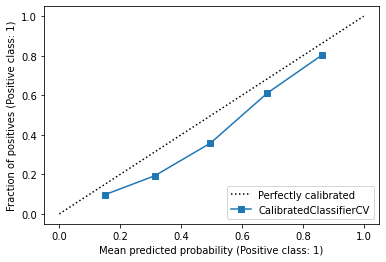

In [ ]:
disp = CalibrationDisplay.from_estimator(calibrated, X_trans, y_valid)

In [ ]:
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope
import time 

def hyperopt(param_space, model, X_train, y_train, X_test, y_test, num_eval):
    
    start = time.time()
    
    def objective_function(params):
        clf = model(**params)
        cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=100)
        n_scores = cross_val_score(clf, X_train, y_train, scoring='f1_macro', cv=cv, n_jobs=-1, verbose=100, error_score='raise')
        print('Macro-F1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
        clf.fit(X_train, y_train)
        result = score(y_test, clf.predict(X_test))
        return {'loss': -result, 'status': STATUS_OK}

    trials = Trials()
    best_param = fmin(objective_function, 
                      param_space, 
                      algo=tpe.suggest, 
                      max_evals=num_eval, 
                      trials=trials)
    loss = [x['result']['loss'] for x in trials.trials]
    
    print("")
    print("##### Results")
    print("Score best parameters: ", min(loss)*-1)
    print("Best parameters: ", best_param)
    print("Time elapsed: ", time.time() - start)
    print("Parameter combinations evaluated: ", num_eval)
    
    return trials, best_param

In [ ]:
LGBM_params = {
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 50, 1)),
    'num_leaves': scope.int(hp.quniform('num_leaves', 5, 50, 1)),

    'colsample_bytree': hp.uniform('colsample_bytree', 0.4, 1.0),
    'subsample': hp.uniform('subsample', 0.4, 1.0),

    'min_child_samples': scope.int(hp.quniform('min_child_samples', 10, 200, 10)),
    'min_child_weight': hp.loguniform('min_child_weight', np.log(1e-3), np.log(1)),
    'min_split_gain': hp.loguniform('min_split_gain', np.log(1e-8), np.log(1)),
    
    'max_delta_step': hp.uniform('min_delta_step', 0, 2),
    'n_estimators': scope.int(hp.quniform('n_estimators', 5, 100, 1)),
    # 'scale_pos_weight':hp.uniform('scale_pos_weight', 1.0, 5.0),
    # 'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    # 'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'random_state': hp.choice('random_state', ['100']),
    'n_jobs': hp.choice('n_jobs', ['-1'])
}
# LGBM(boosting_type='gbdt', num_leaves=40, max_depth=-1, learning_rate=0.2, n_estimators=100, class_weight='balanced', reg_lambda=0, random_state=100, reg_alpha=0, n_jobs=-1)

In [ ]:
iterations, best_params = hyperopt(LGBM_params, LGBM,  X_res, y_res, X_trans, y_valid, 20)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.5min

[Parallel(n_jobs=-1)]: Done   2 out of  24 | elapsed:  3.5min remaining: 38.3min

[Parallel(n_jobs=-1)]: Done   3 out of  24 | elapsed:  3.5min remaining: 24.4min

[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:  3.5min remaining: 17.5min

[Parallel(n_jobs=-1)]: Done   5 out of  24 | elapsed:  3.5min remaining: 13.4min

[Parallel(n_jobs=-1)]: Done   6 out of  24 | elapsed:  3.5min remaining: 10.6min

[Parallel(n_jobs=-1)]: Done   7 out of  24 | elapsed:  3.5min remaining:  8.6min

[Parallel(n_jobs=-1)]: Done   8 out of  24 | elapsed:  3.5min remaining:  7.1min

[Parallel(n_jobs=-1)]: Done   9 out of  24 | elapsed:  3.5min remaining:  5.9min

[Parallel(n_jobs=-1)]: Done  10 out of  24 | elapsed:  3.6min remaining:  5.1min

[Parallel(n_jobs=-1)]: Done  11 out of  24 | elapsed:  3.7min remaining:  4.3min

[Parallel(n_jobs=-1)]: Done  12 out of 

NameError: name 'clf_best' is not defined

In [ ]:
NuSVC_params = {
    'kernel': hp.choice('kernel', ['rbf', 'linear', 'sigmoid']),
    'nu': hp.uniform('nu', 0.1, 1.0),
    'gamma': hp.uniform('gamma', 1e-2, 1),
    'class_weight': hp.choice('class_weight', [None, 'balanced']),
    'max_iter': hp.choice('max_iter', [100, 200]),
    'random_state': hp.choice('random_state', [-1, 1000]),
}

In [ ]:
iterations, best_params = hyperopt(NuSVC_params, NuSVC,  X_res, y_res, X_trans, y_valid, 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 10.8min

[Parallel(n_jobs=-1)]: Done   2 out of  24 | elapsed: 10.9min remaining: 120.4min

[Parallel(n_jobs=-1)]: Done   3 out of  24 | elapsed: 10.9min remaining: 76.6min

[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed: 11.0min remaining: 54.8min

[Parallel(n_jobs=-1)]: Done   5 out of  24 | elapsed: 11.0min remaining: 41.6min

[Parallel(n_jobs=-1)]: Done   6 out of  24 | elapsed: 11.0min remaining: 32.9min

[Parallel(n_jobs=-1)]: Done   7 out of  24 | elapsed: 11.0min remaining: 26.7min

[Parallel(n_jobs=-1)]: Done   8 out of  24 | elapsed: 11.1min remaining: 22.1min

[Parallel(n_jobs=-1)]: Done   9 out of  24 | elapsed: 11.1min remaining: 18.5min

[Parallel(n_jobs=-1)]: Done  10 out of  24 | elapsed: 11.1min remaining: 15.5min

[Parallel(n_jobs=-1)]: Done  11 out of  24 | elapsed: 11.1min remaining: 13.1min

[Parallel(n_jobs=-1)]: Done  12 out of